# Implementation of plain RNN

We loosly follow the imoplementation at https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/.

For our task we need to implement a network where it takes the current and previous inputs to predict the electrical output. If useful, we can include the previous electrical oputput as well.

For all the data we need to implement the difference, scale all and then train the model.

## Preliminaries

### Load libraries

In [1]:
#import own functions
import Global_Functions as gf
import Neuronal_Networks as nn

#import python standards
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import time
timestr = time.strftime("%Y-%m-%d_%H-%M_")

#import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [2]:
np.random.seed(123)

### Open Folder and Files

In [3]:
OPEN_FOLDER = '../Data/Preped_Data/'

In [4]:
ex_1 = gf.open_CSV_file('experiment_1_short.csv', OPEN_FOLDER)
ex_4 = gf.open_CSV_file('experiment_4_short.csv', OPEN_FOLDER)
ex_9 = gf.open_CSV_file('experiment_9_short.csv', OPEN_FOLDER)
ex_20 = gf.open_CSV_file('experiment_20_short.csv', OPEN_FOLDER)
ex_21 = gf.open_CSV_file('experiment_21_short.csv', OPEN_FOLDER)
ex_22 = gf.open_CSV_file('experiment_22_short.csv', OPEN_FOLDER)
ex_23 = gf.open_CSV_file('experiment_23_short.csv', OPEN_FOLDER)
ex_24 = gf.open_CSV_file('experiment_24_short.csv', OPEN_FOLDER)

In [5]:
experiments = [ex_1, ex_4, ex_9, ex_20, ex_21, ex_22, ex_23, ex_24]
names = ['1', '4', '9', '20', '21','22', '23', '24']

In [6]:
OPEN_SYNTHETIC = 'C:/Users/FlorianLeiser/Documents/Masterarbeit/Data/Synthetic_Data/Without_Noise/Sample_Ratio_0.1/quadratic_40_0_linear_1'

In [7]:
experiments = gf.load_synthetic(OPEN_SYNTHETIC, length = 50)
names = [str(x+1) for x in range(len(experiments)-1)]
names.append("hand")

### Specify parameters

In [8]:
NEUR = 128
EPOCH = 200
LAG = 60
DIFFERENCE = None
BATCH_SIZE = 128

In [9]:
# ex_train = ex_20
# ex_val = ex_21

# train = "20"
# val = "21"

In [10]:
train = "60"
val = "20"

train_exs = experiments[:15]
ex_train = gf.use_multiple_experiments(train_exs)
ex_val = gf.use_multiple_experiments(experiments[15:18])
ex_test = gf.use_multiple_experiments(experiments[18:20])

In [11]:
image_path = "../Images/RNN/Synthetic/0.1/" + timestr
specs = "training_{0} val_{1} {2}_neurons__{3}_epochs__lag_{4}_batch_{5}" 
image_folder = image_path + specs.format(train, val, NEUR, EPOCH, LAG, BATCH_SIZE) + "/"
gf.check_folder(image_folder)

Creation of directory ../Images/RNN/Synthetic/0.1/2021-05-16_13-54_training_60 val_20 128_neurons__200_epochs__lag_60_batch_128/ successful.


In [12]:
model_path = "../Models/RNN/Synthetic/0.1/" + timestr
specs = "training_{0} val_{1} {2}_neurons__{3}_epochs__lag_{4}_batch_{5}" 
model_folder = model_path + specs.format(train, val, NEUR, EPOCH, LAG, BATCH_SIZE) + "/"
gf.check_folder(model_folder)

Creation of directory ../Models/RNN/Synthetic/0.1/2021-05-16_13-54_training_60 val_20 128_neurons__200_epochs__lag_60_batch_128/ successful.


## Train model

We use scaling and the fitting method which both are in the Neural Network file in the utilities folder.

In [13]:
model, history, scaler, X_train, y_train, _, X_val, y_val = nn.train_model(ex_train, ex_val,
                                                                           difference_chosen = DIFFERENCE,
                                                                           save_folder = model_folder,
                                                                           lag_chosen=LAG, batch_size = BATCH_SIZE,
                                                                           neurons_chosen=NEUR, nmb_epochs=EPOCH)

Folder already exists.
1004/1004 [==============================] - 6s 6ms/step - loss: 0.3316 - val_loss: 0.5849
Epoch 10 done.
1004/1004 [==============================] - 5s 5ms/step - loss: 0.3491 - val_loss: 0.5685
Epoch 20 done.
1004/1004 [==============================] - 5s 5ms/step - loss: 0.3401 - val_loss: 0.5550
Epoch 30 done.
1004/1004 [==============================] - 6s 5ms/step - loss: 0.2955 - val_loss: 0.5742
Epoch 40 done.
1004/1004 [==============================] - 5s 5ms/step - loss: 0.2429 - val_loss: 0.5081
Epoch 50 done.
1004/1004 [==============================] - 5s 5ms/step - loss: 0.3418 - val_loss: 0.5563
Epoch 60 done.
1004/1004 [==============================] - 5s 5ms/step - loss: 0.2955 - val_loss: 0.4906
Epoch 70 done.
1004/1004 [==============================] - 6s 6ms/step - loss: 0.2878 - val_loss: 0.5647
Epoch 80 done.
1004/1004 [==============================] - 6s 6ms/step - loss: 0.2123 - val_loss: 0.6122


1004/1004 [==============================] - 6s 6ms/step - loss: 0.2426 - val_loss: 0.5875
Epoch 90 done.
1004/1004 [==============================] - 5s 5ms/step - loss: 0.2693 - val_loss: 0.5491
Epoch 100 done.
1004/1004 [==============================] - 5s 5ms/step - loss: 0.2320 - val_loss: 0.6036
Epoch 110 done.
1004/1004 [==============================] - 6s 6ms/step - loss: 0.2523 - val_loss: 0.5297
Epoch 120 done.
1004/1004 [==============================] - 5s 5ms/step - loss: 0.2429 - val_loss: 0.5350
Epoch 130 done.
1004/1004 [==============================] - 5s 5ms/step - loss: 0.2189 - val_loss: 0.6370
Epoch 140 done.
1004/1004 [==============================] - 5s 5ms/step - loss: 0.2797 - val_loss: 0.5714
Epoch 150 done.
1004/1004 [==============================] - 5s 5ms/step - loss: 0.2440 - val_loss: 0.5962
Epoch 160 done.
1004/1004 [==============================] - 5s 5ms/step - loss: 0.2793 - val_loss: 0.6072
Epoch 170 done.
1004/1004 [===========================

1004/1004 [==============================] - 5s 5ms/step - loss: 0.2699 - val_loss: 0.5749
Epoch 180 done.
1004/1004 [==============================] - 5s 5ms/step - loss: 0.2579 - val_loss: 0.5910
Epoch 190 done.
1004/1004 [==============================] - 4s 4ms/step - loss: 0.2892 - val_loss: 0.5676
Epoch 200 done.


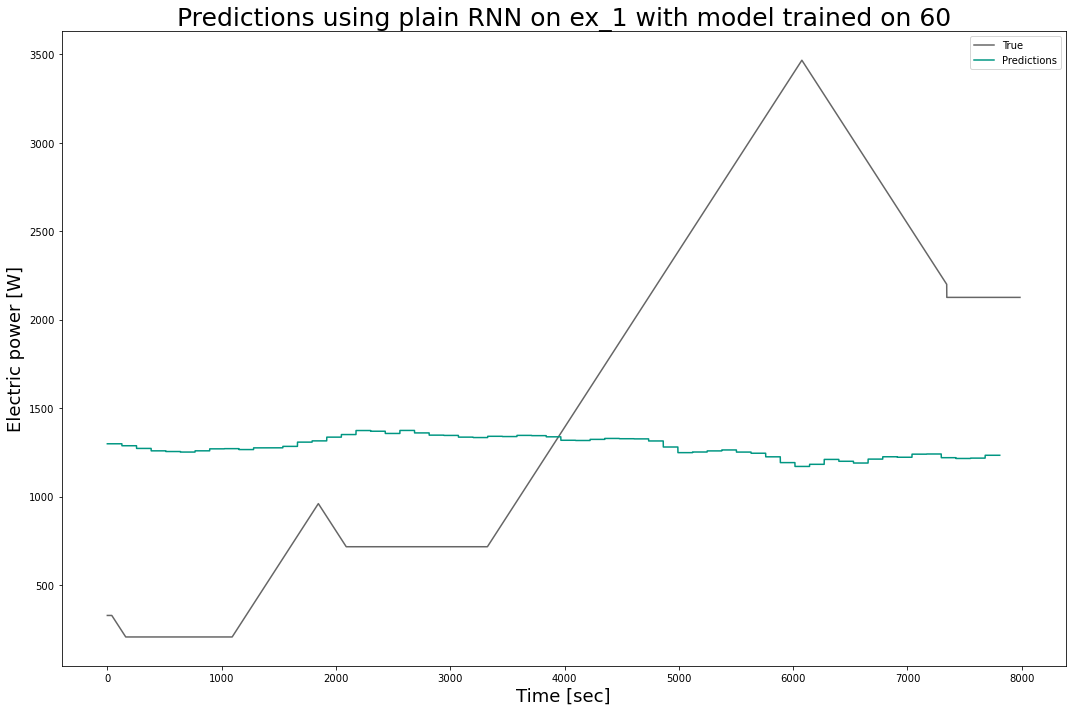

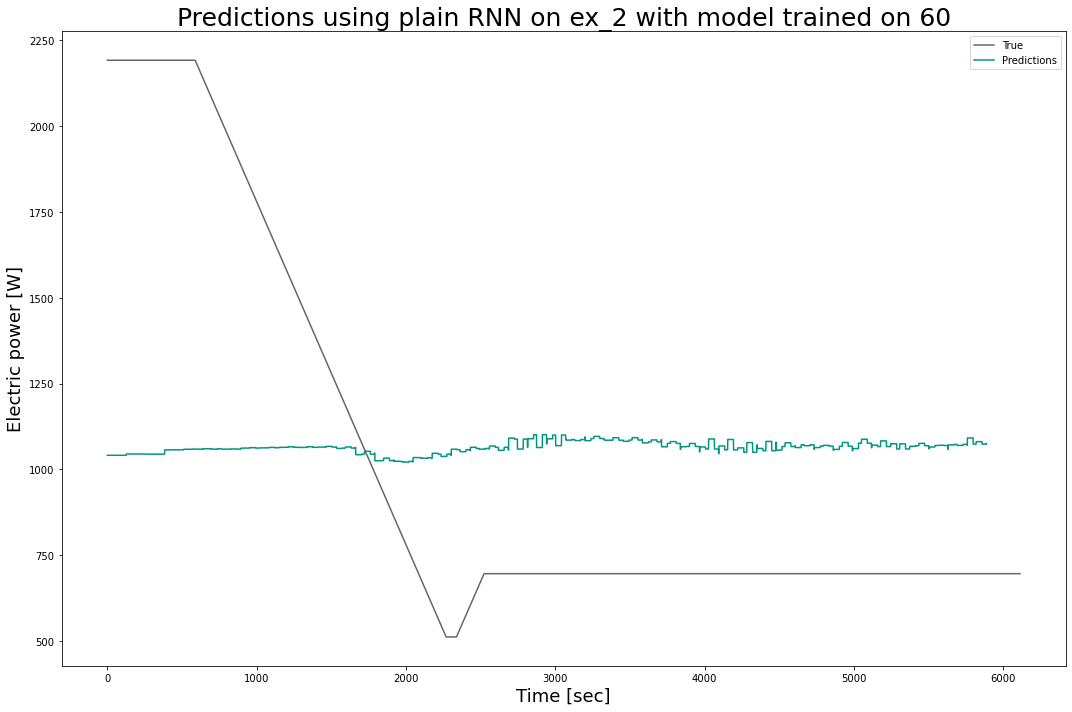

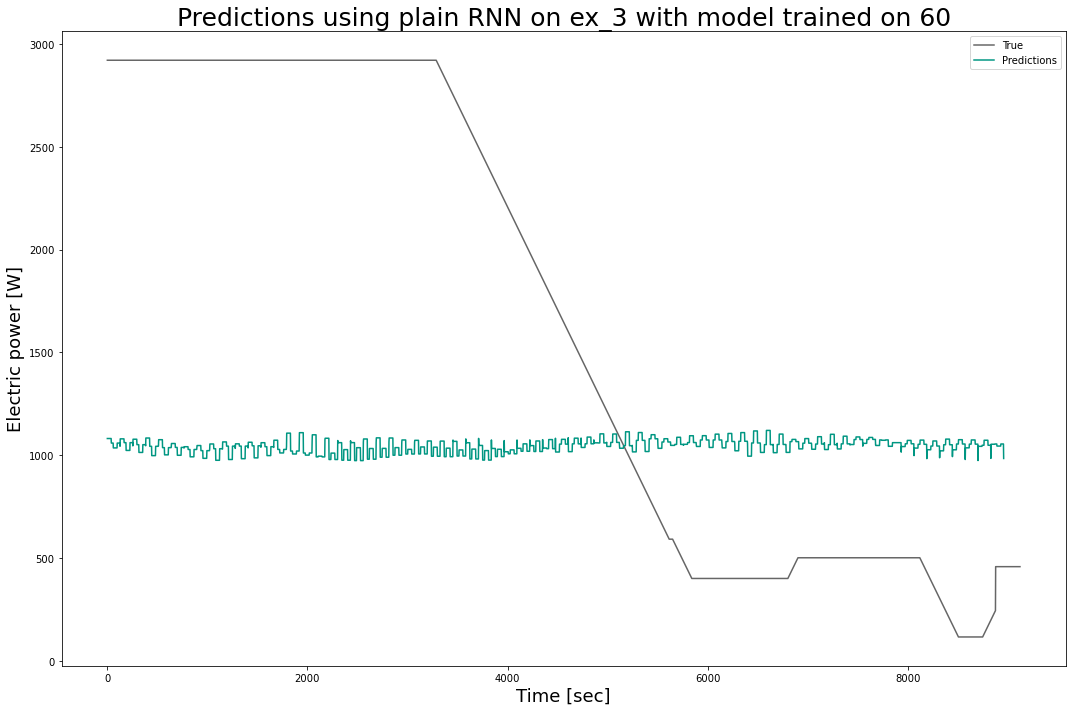

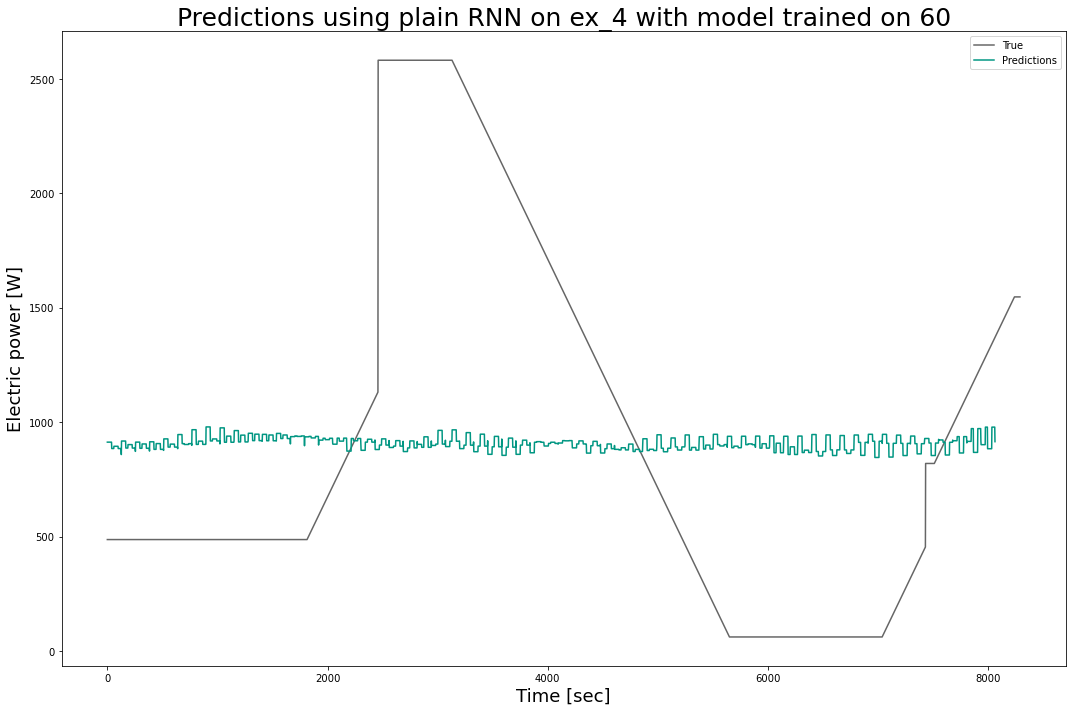

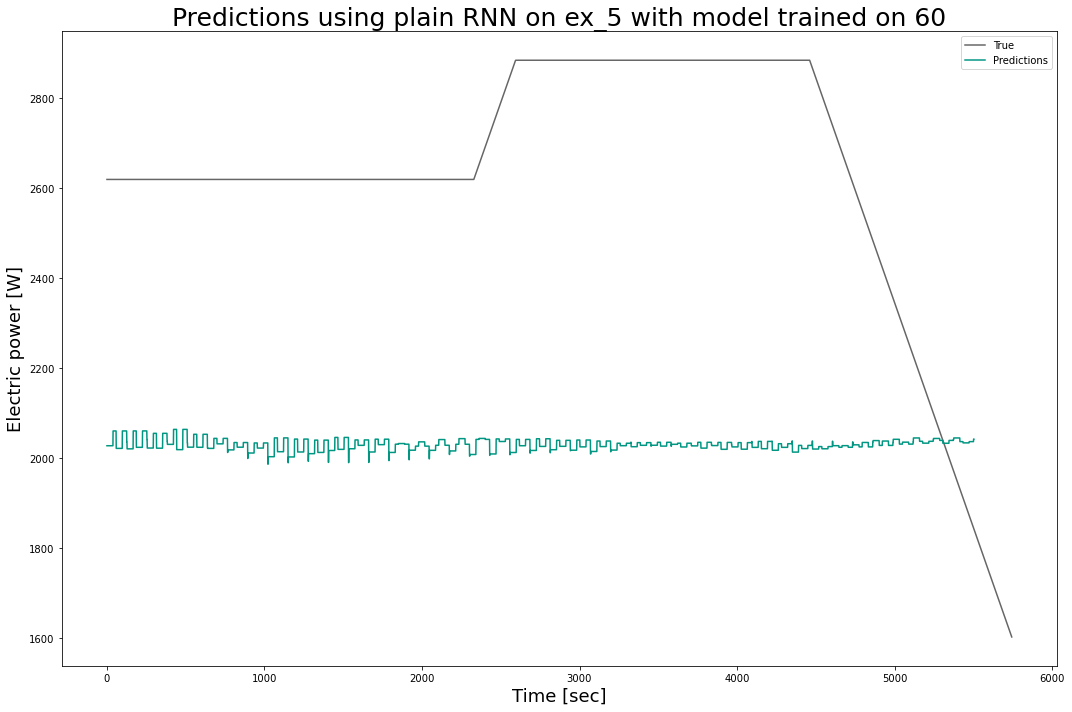

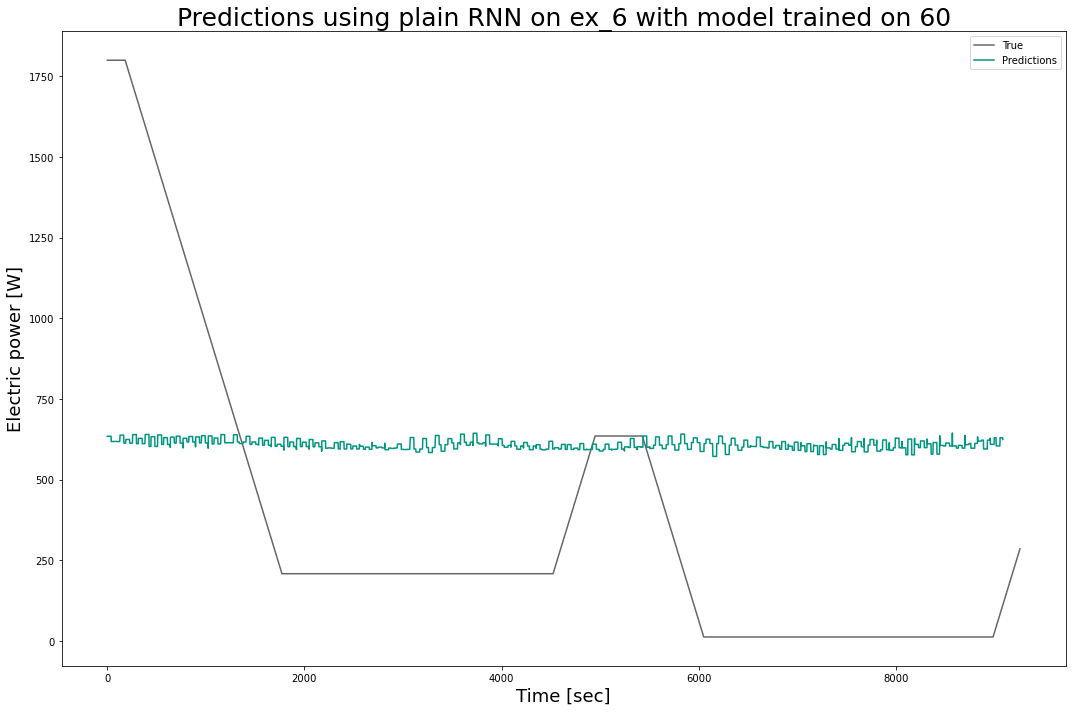

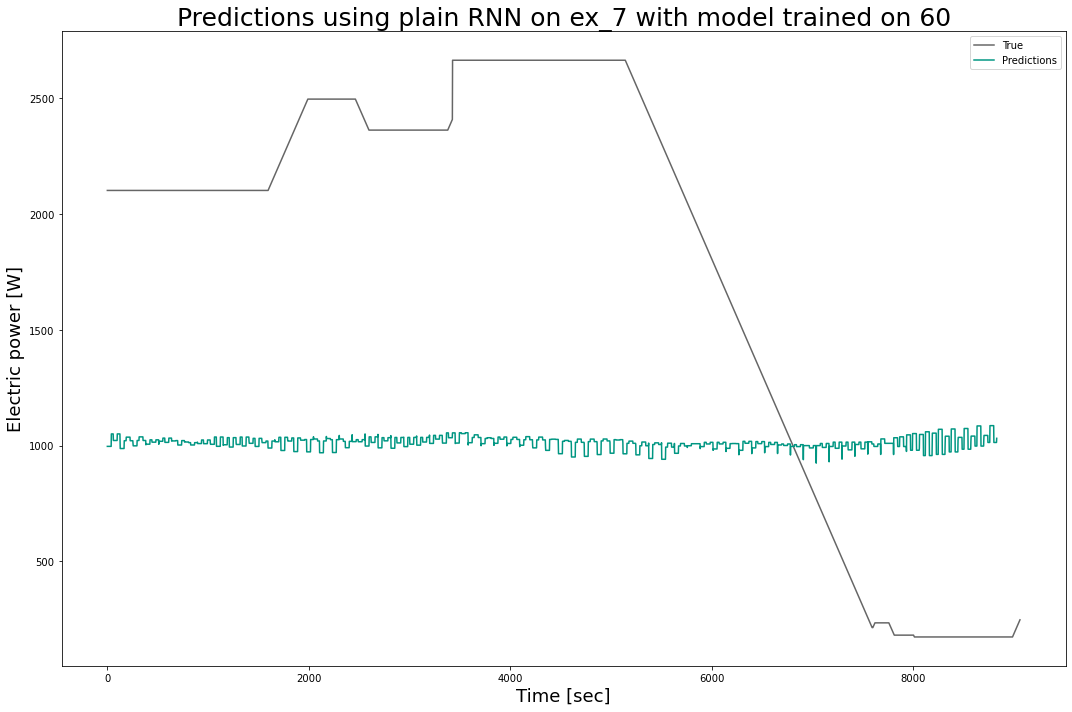

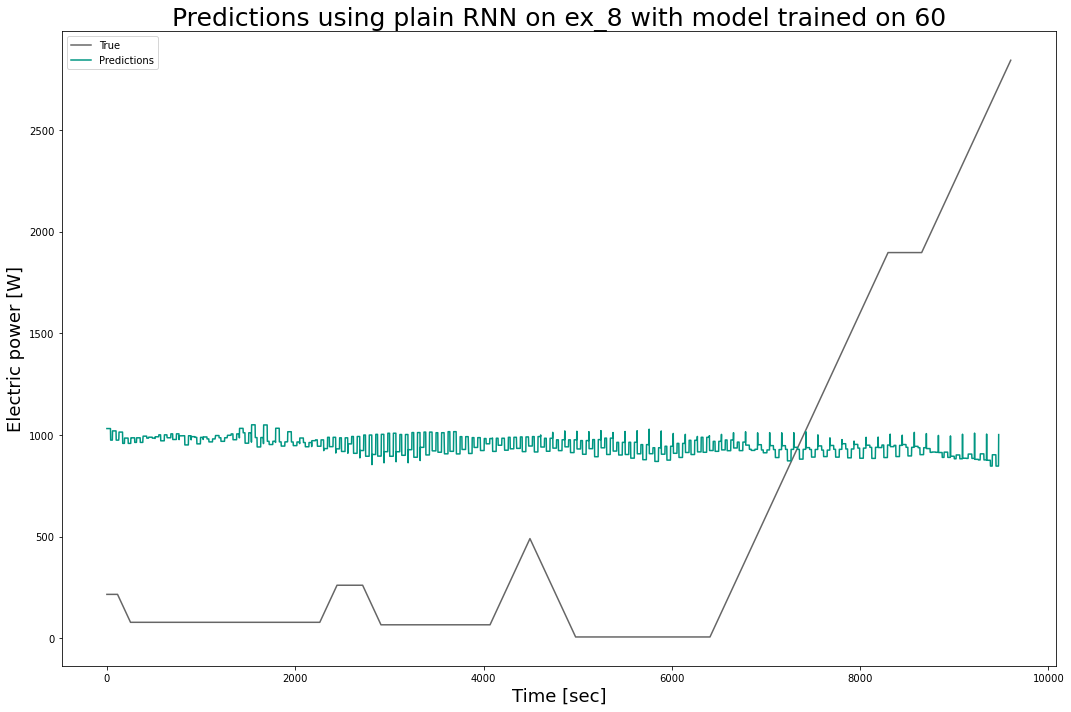

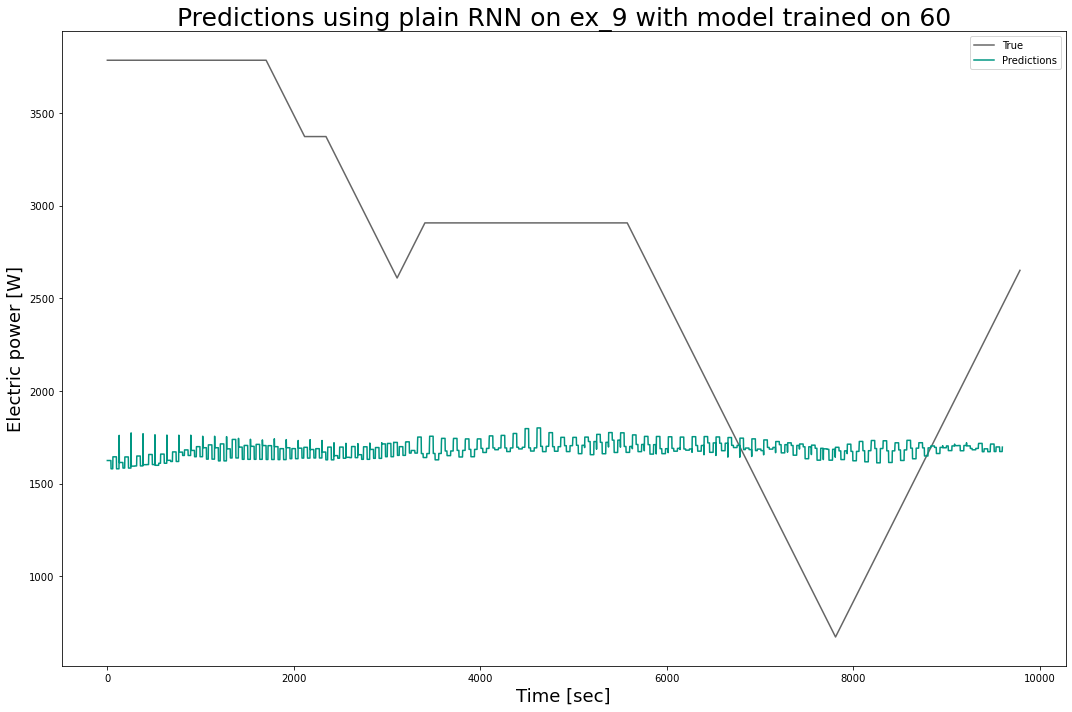

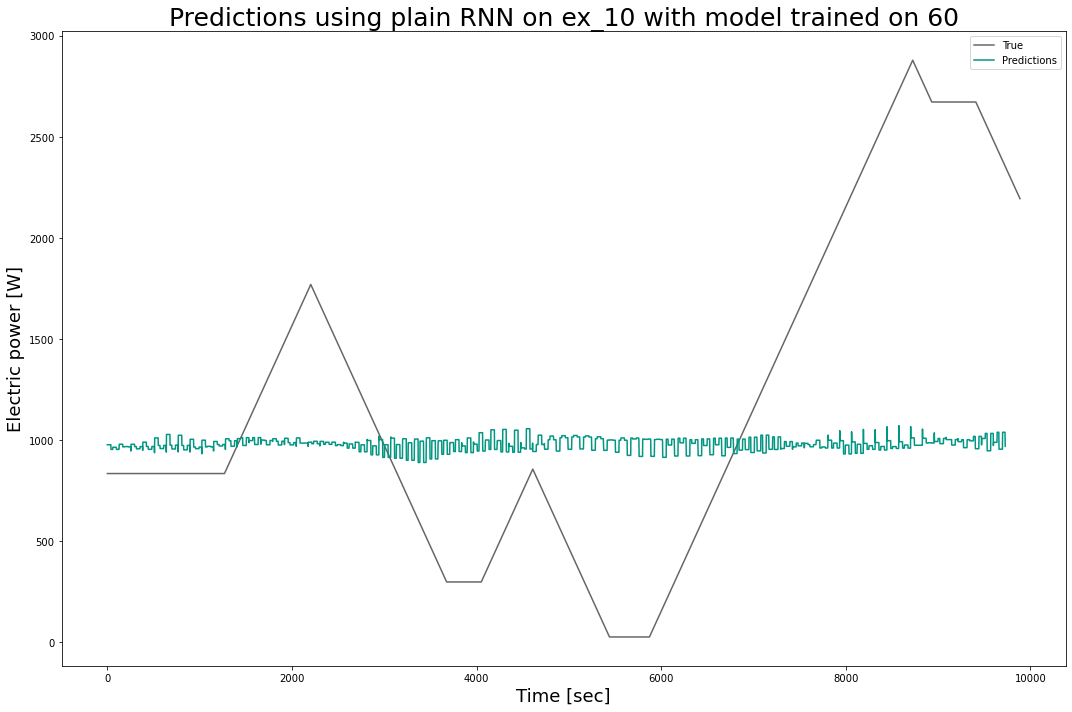

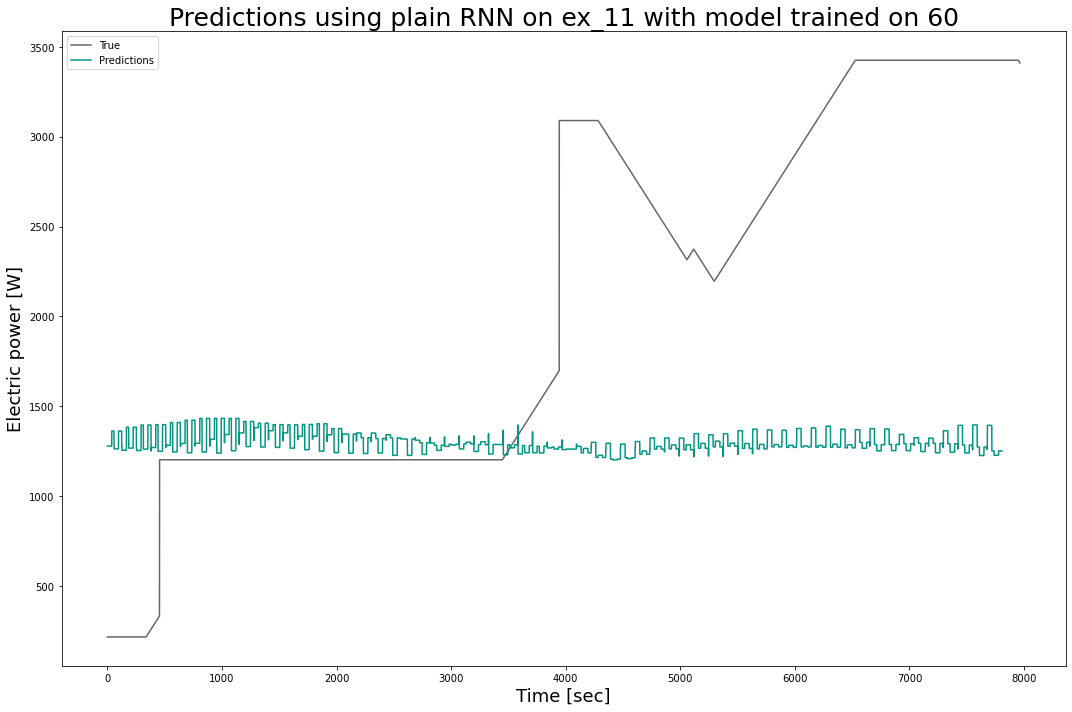

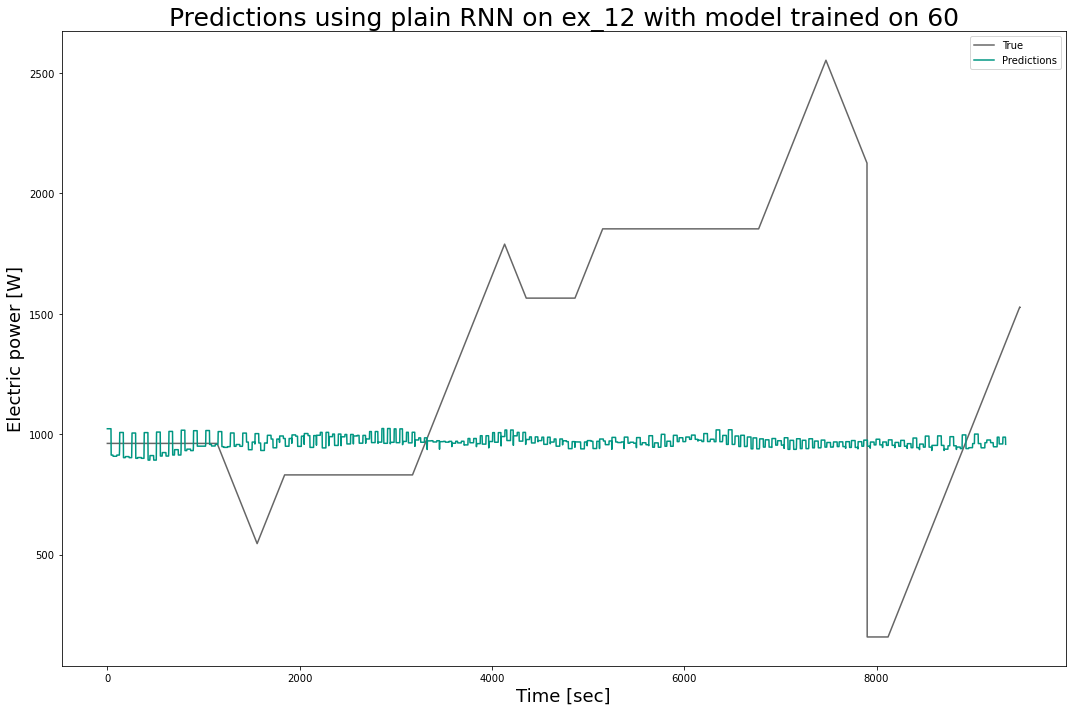

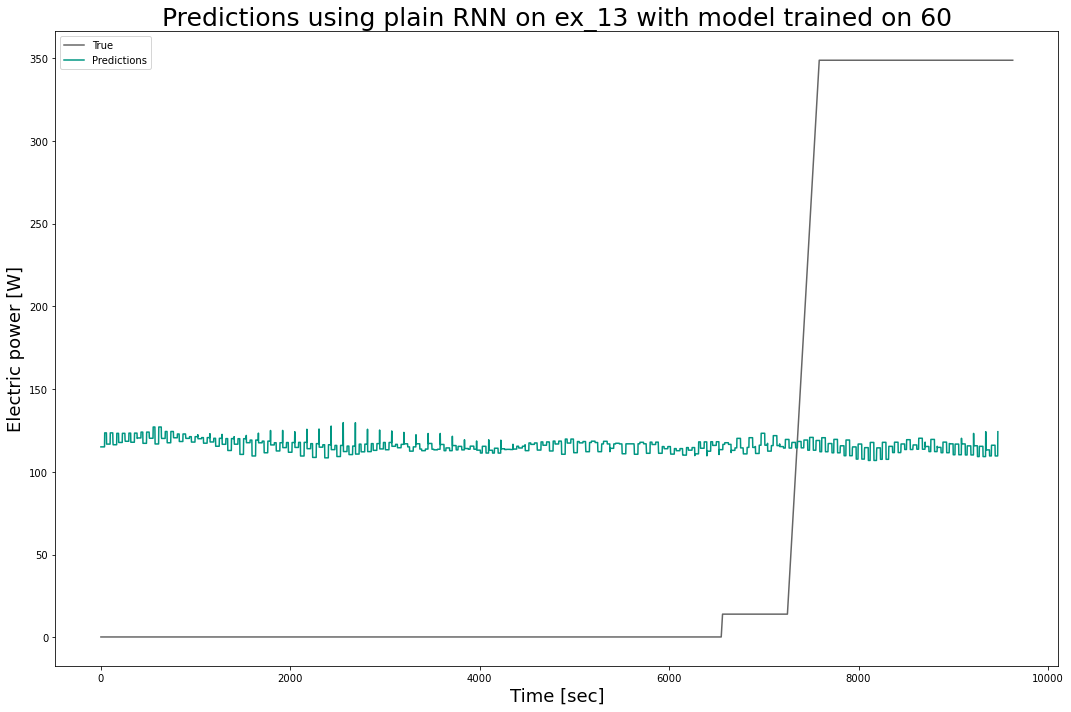

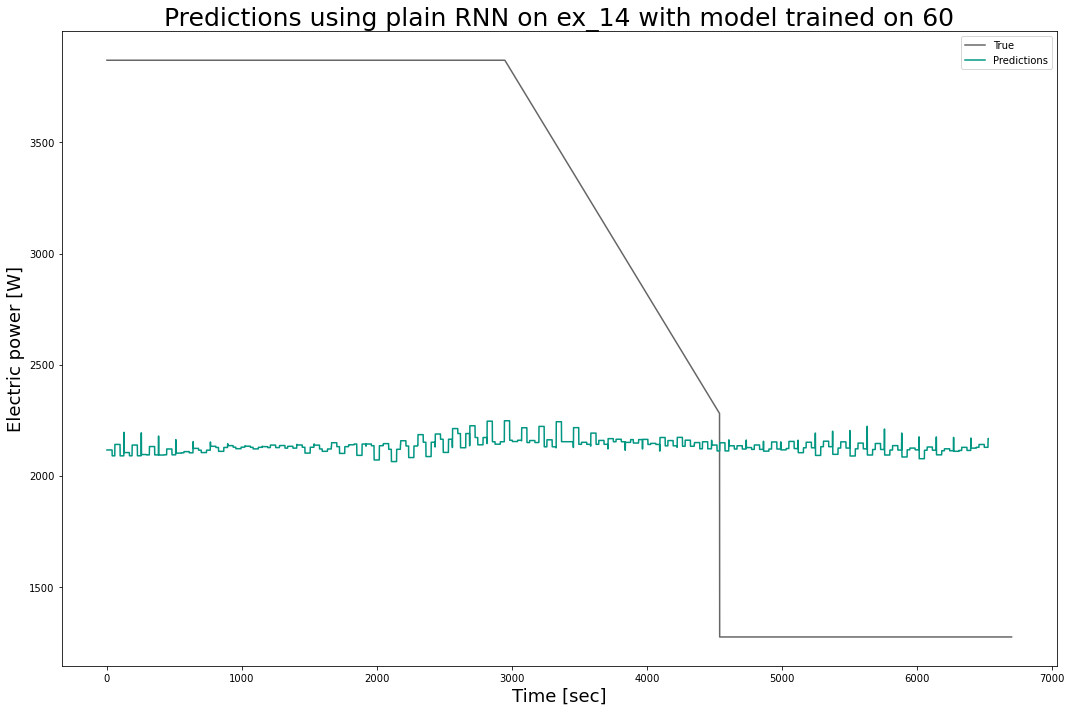

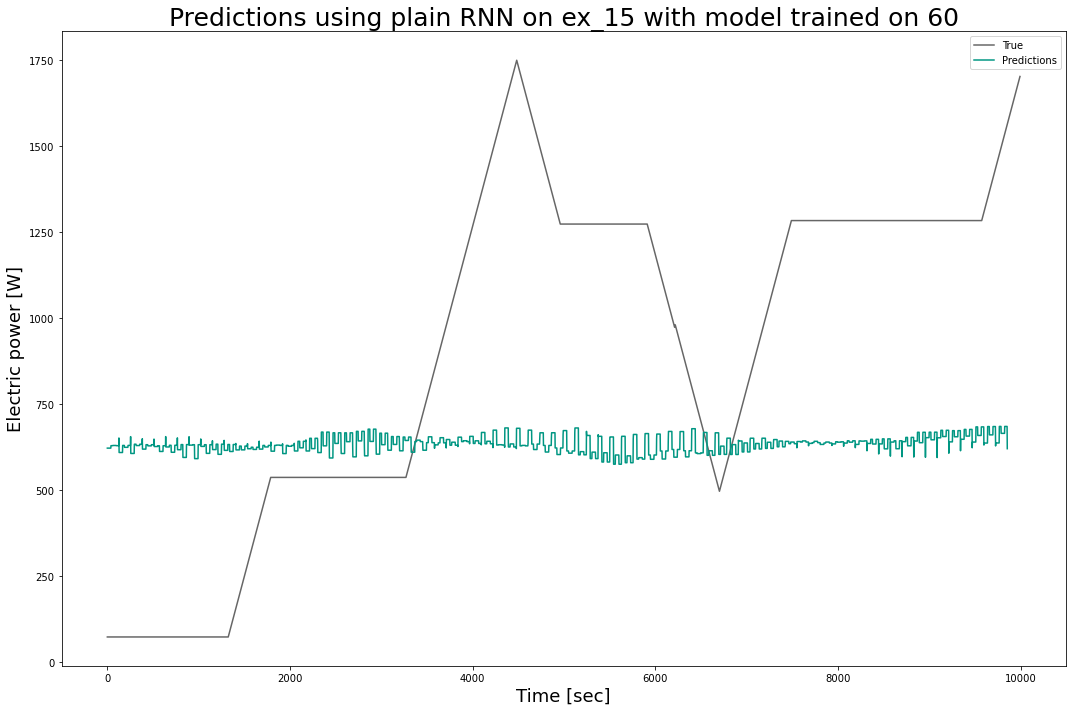

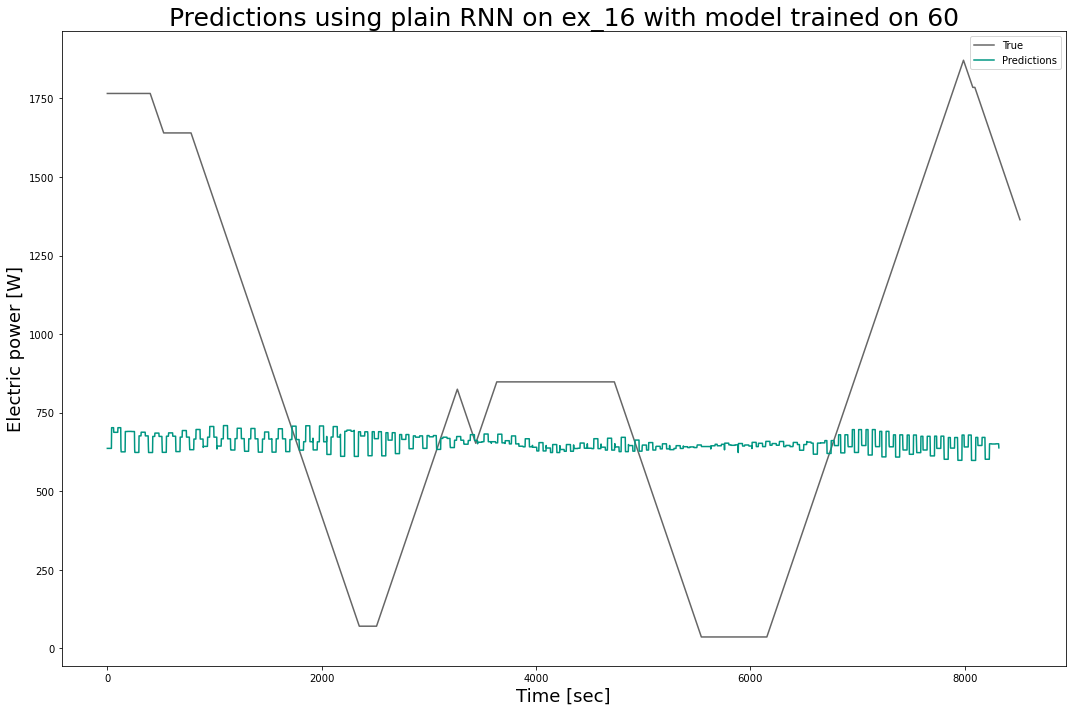

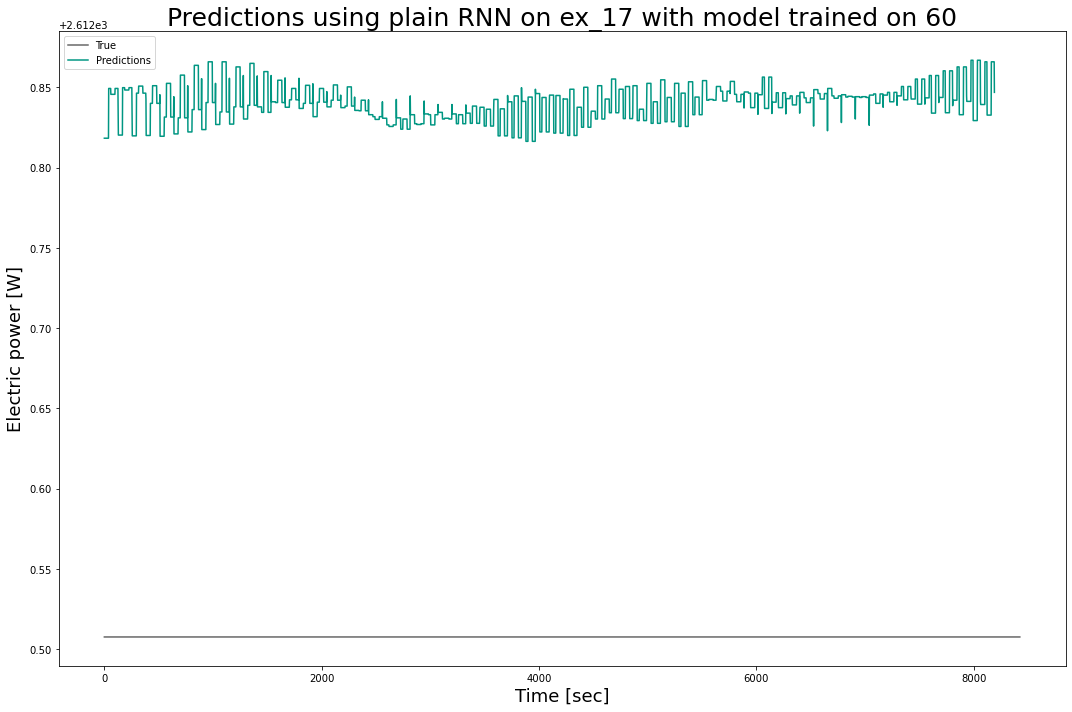

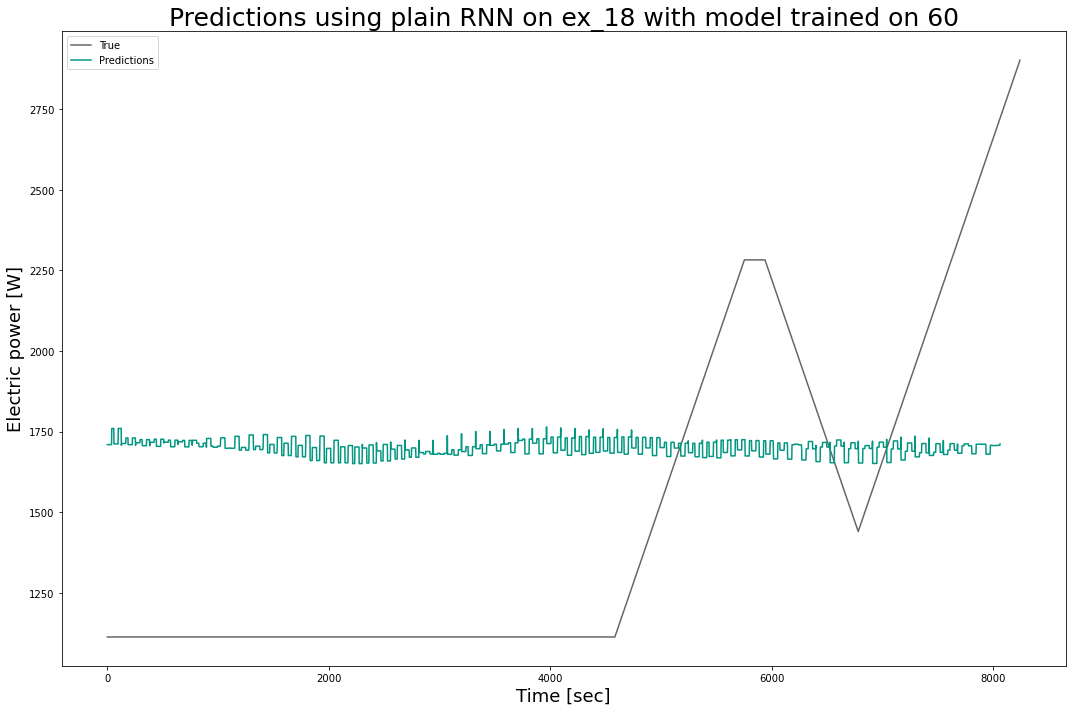

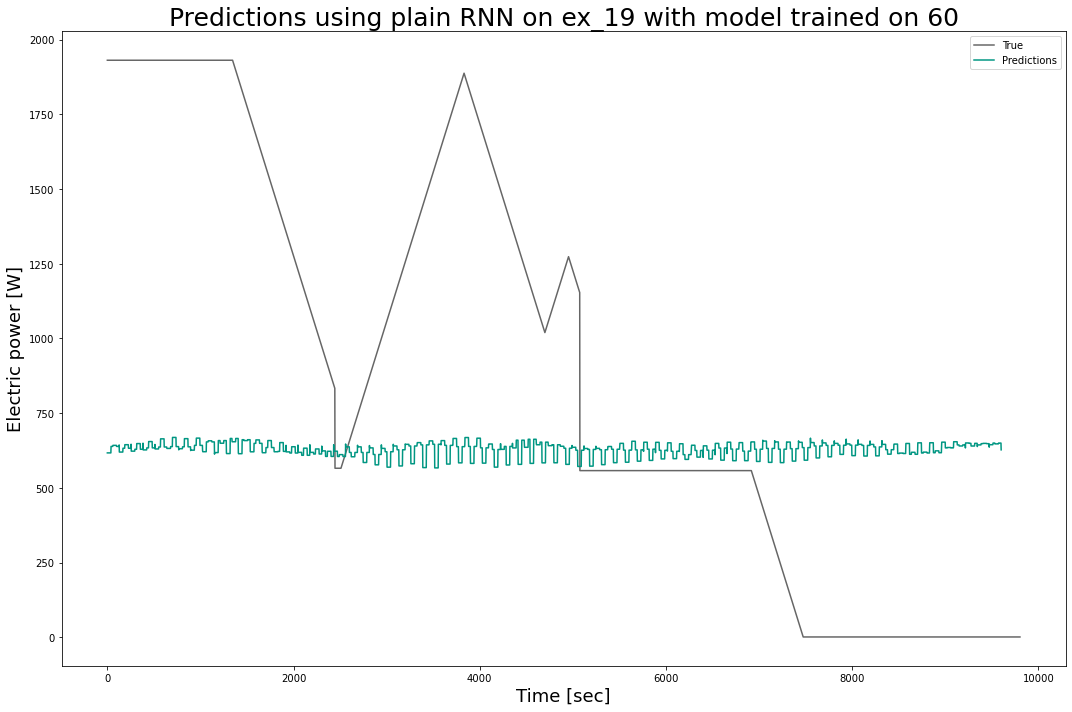

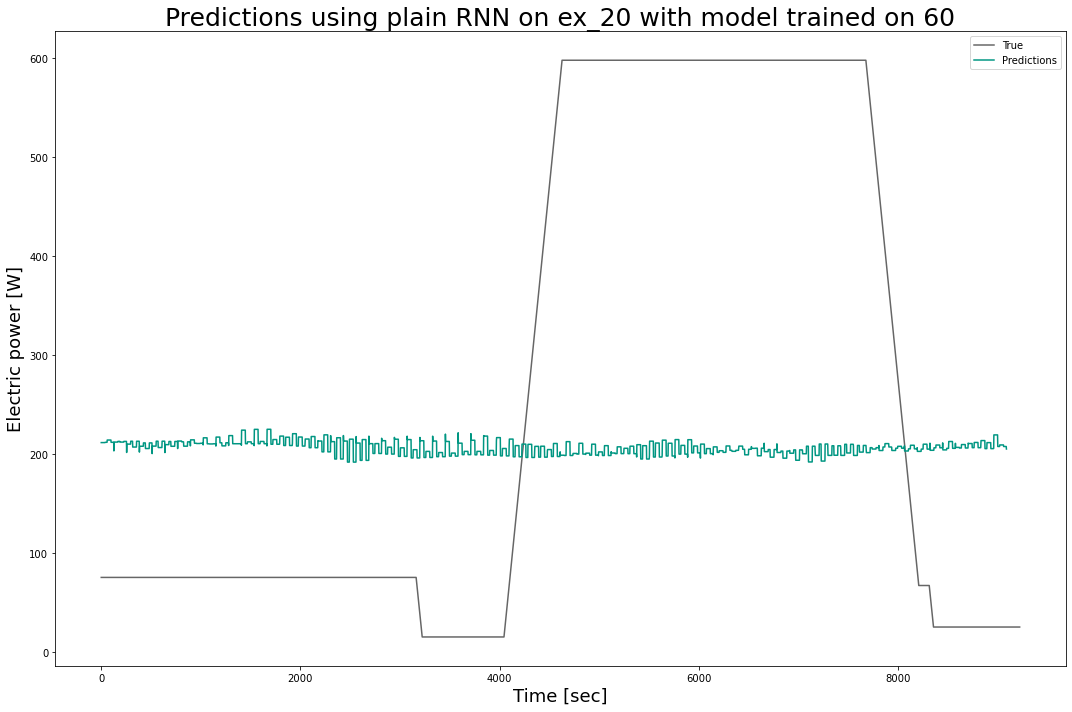

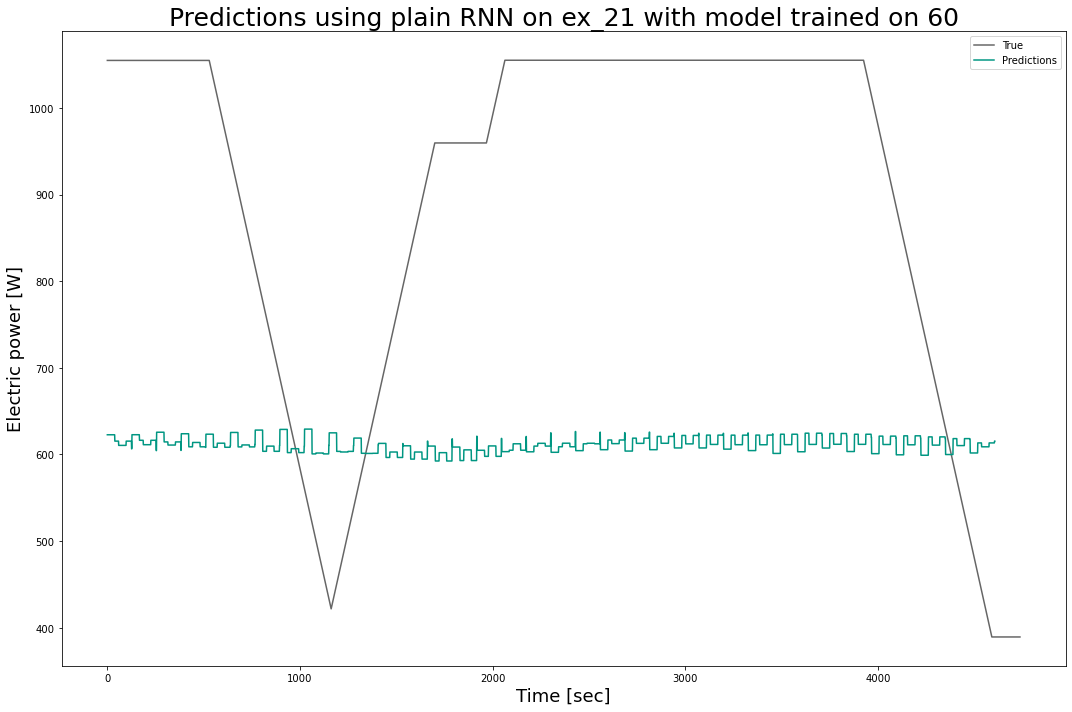

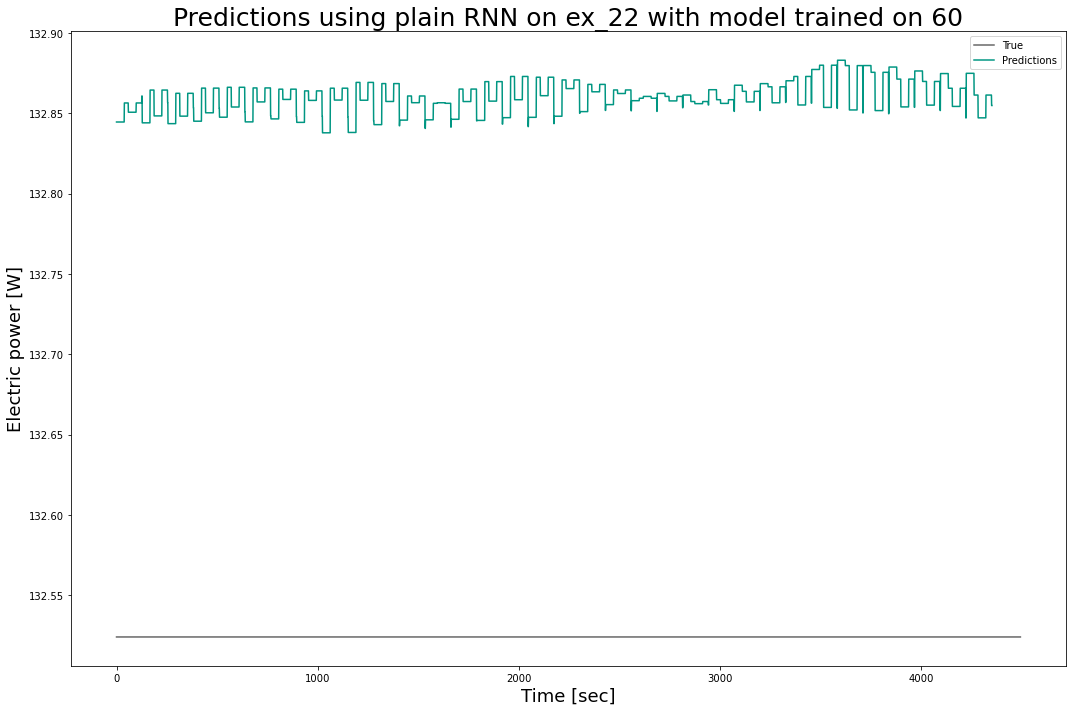

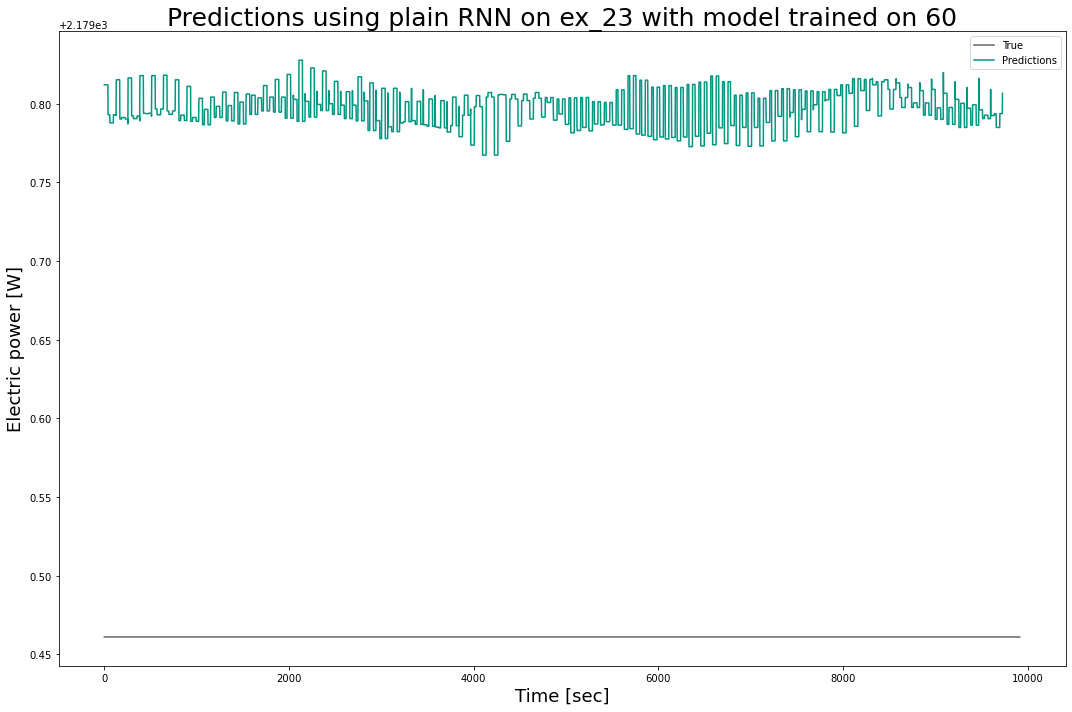

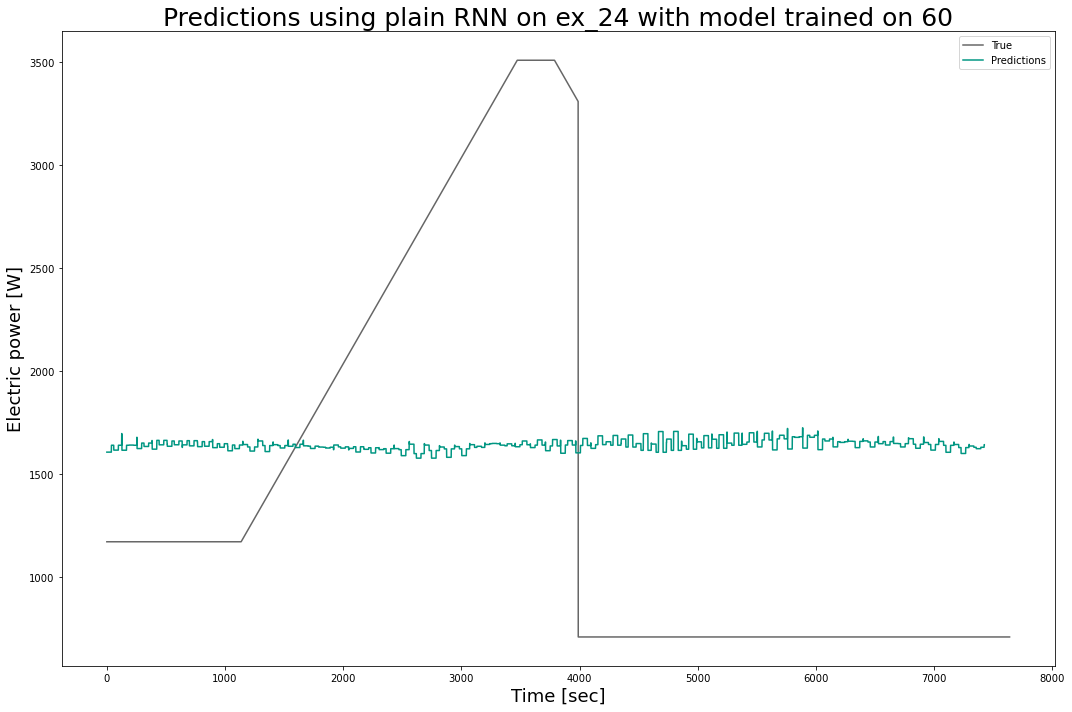

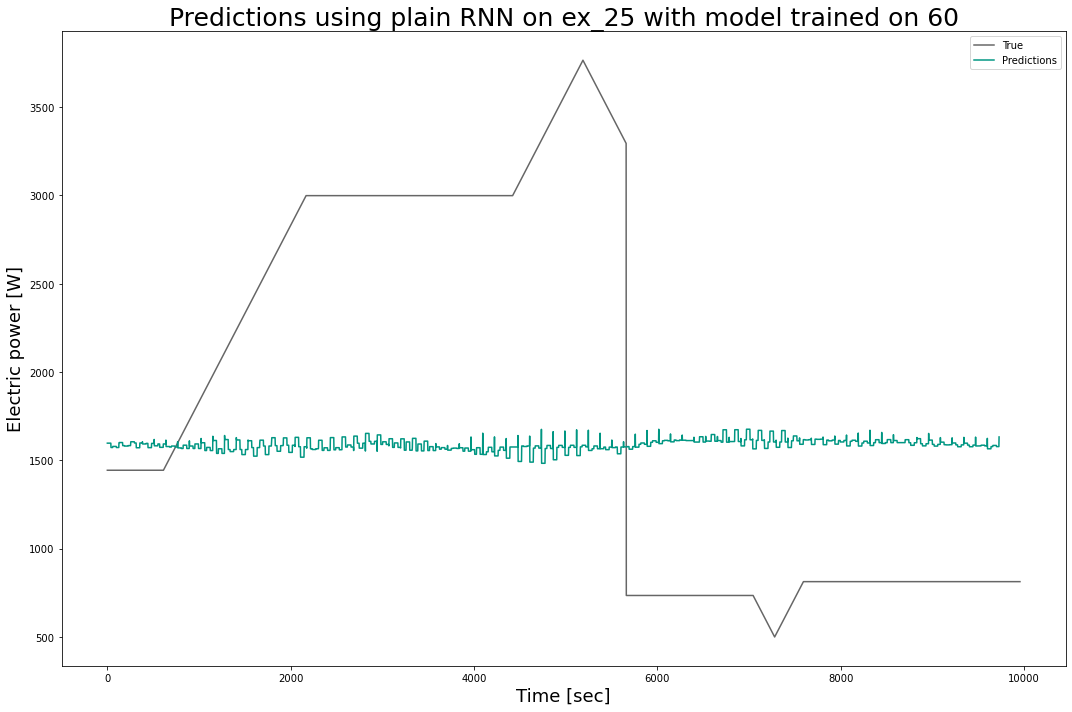

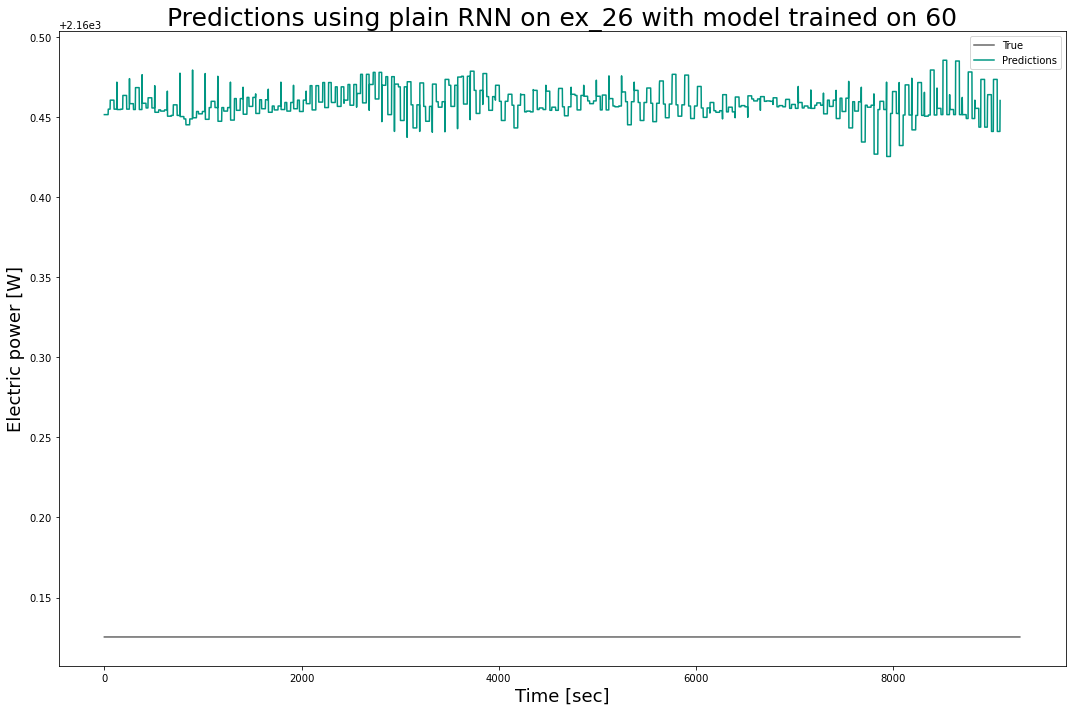

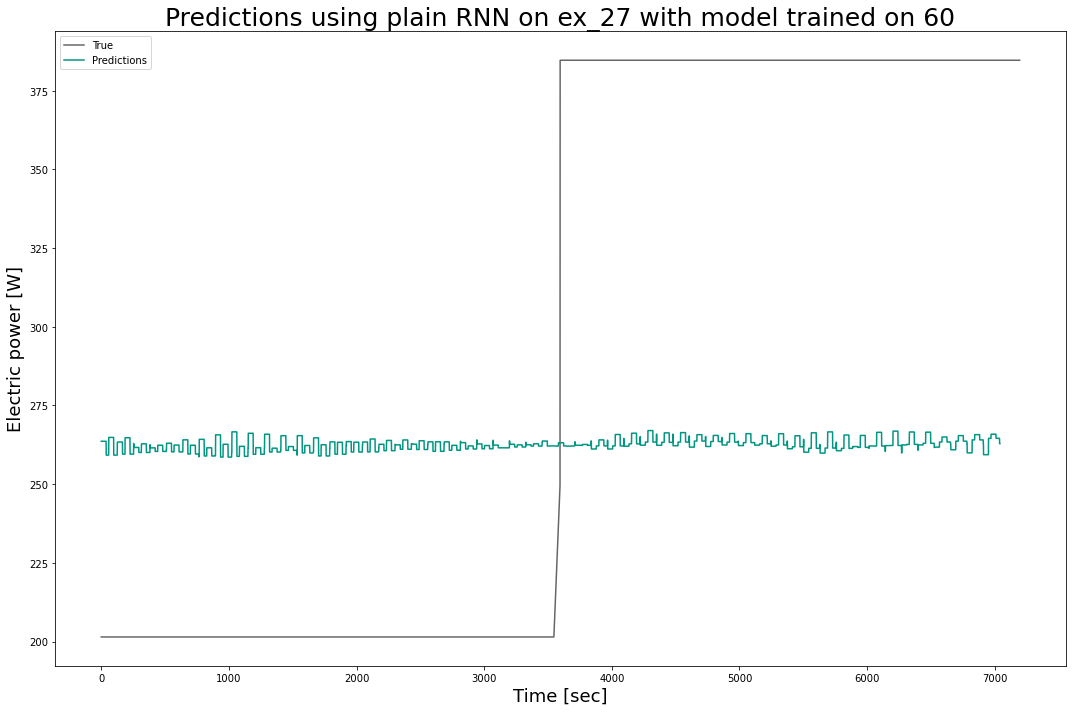

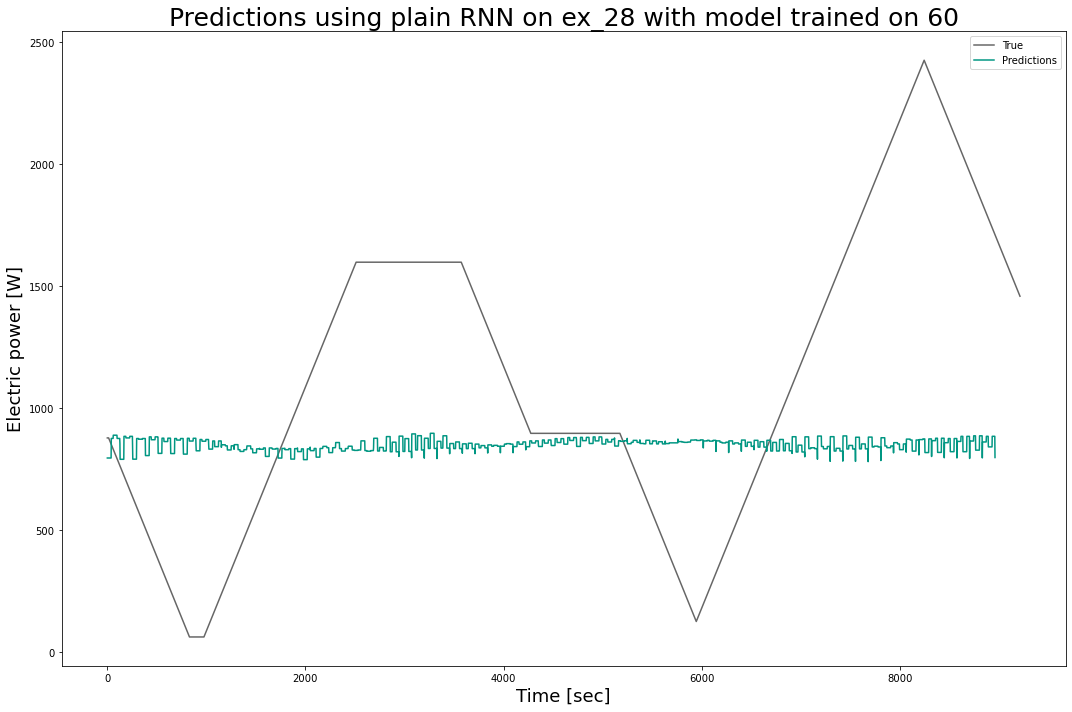

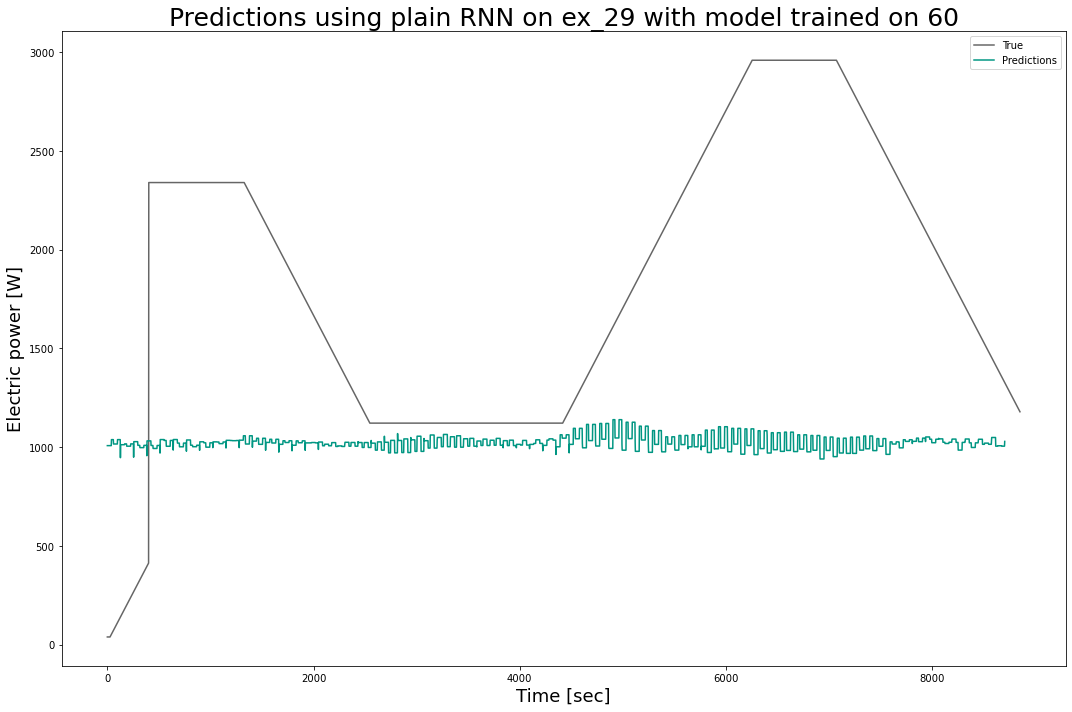

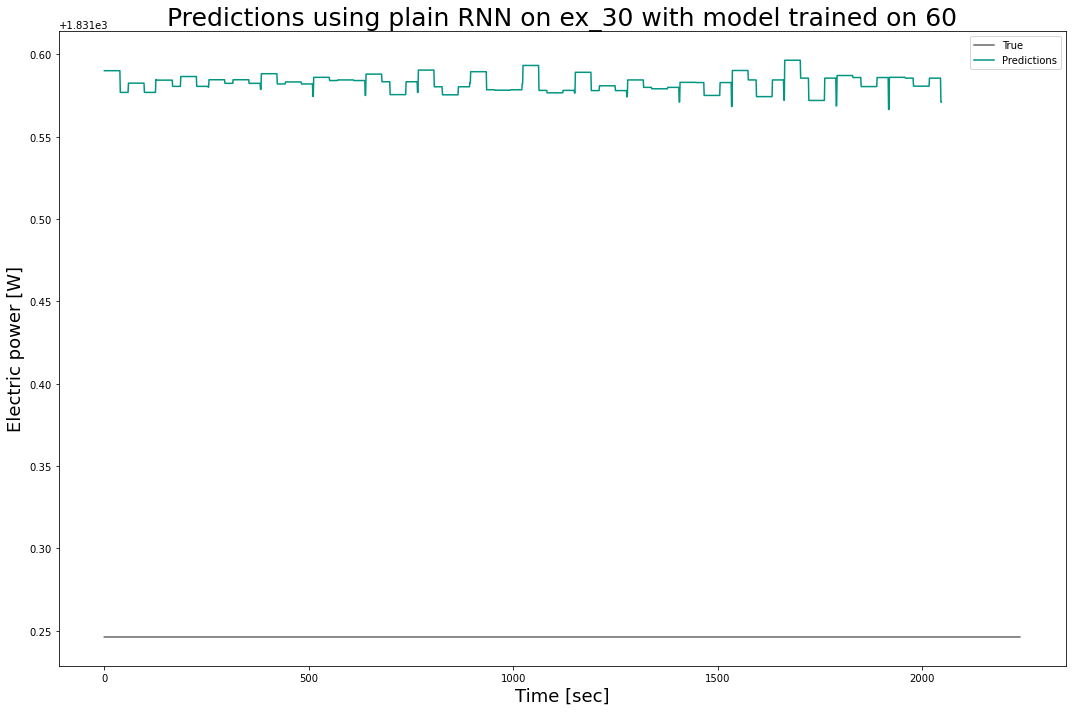

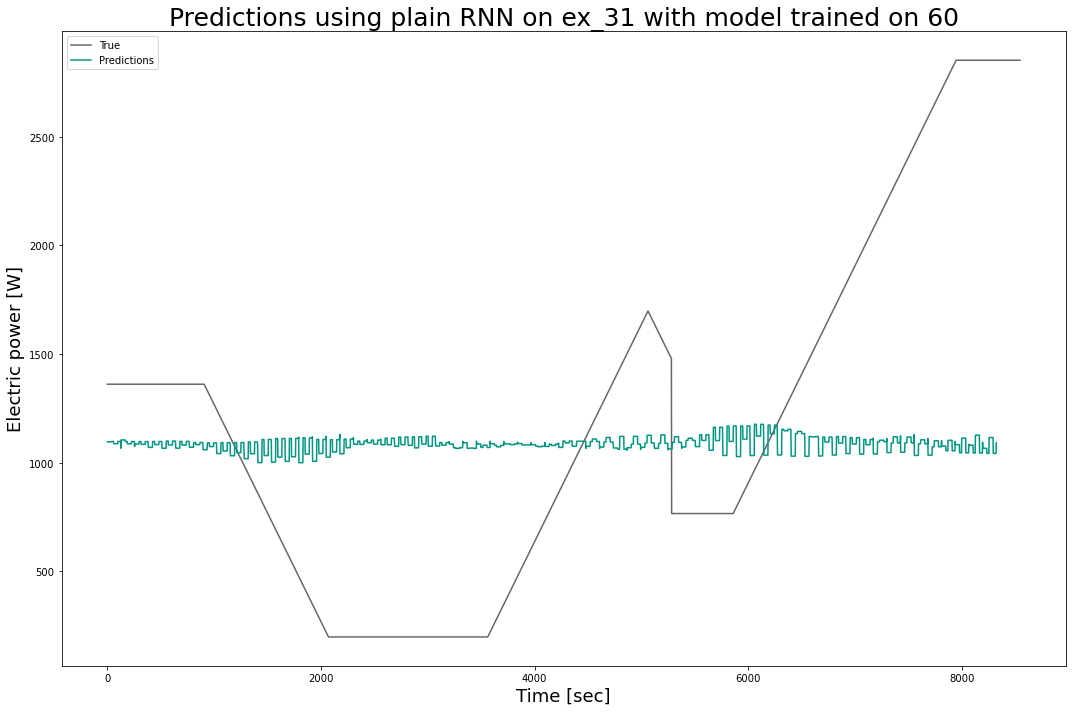

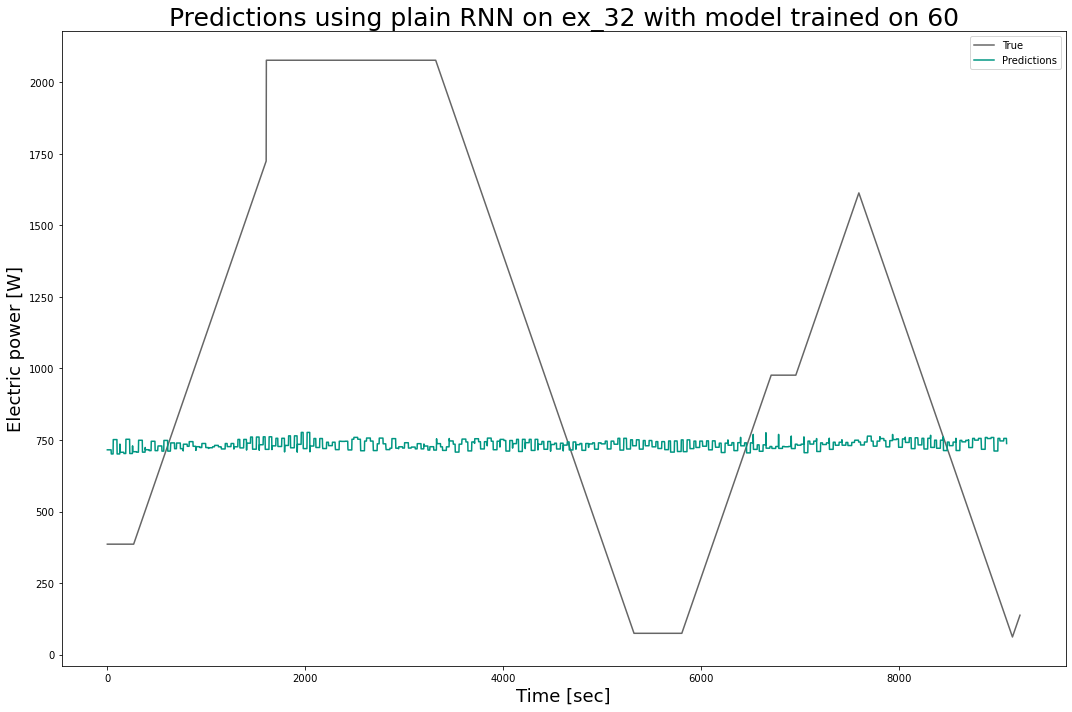

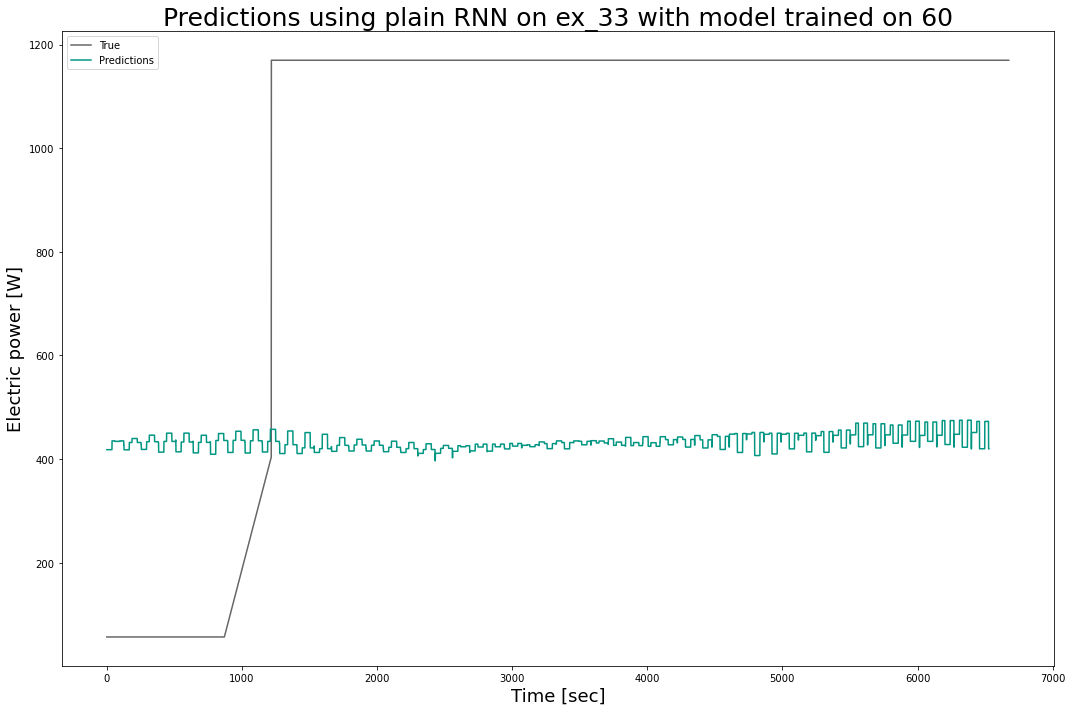

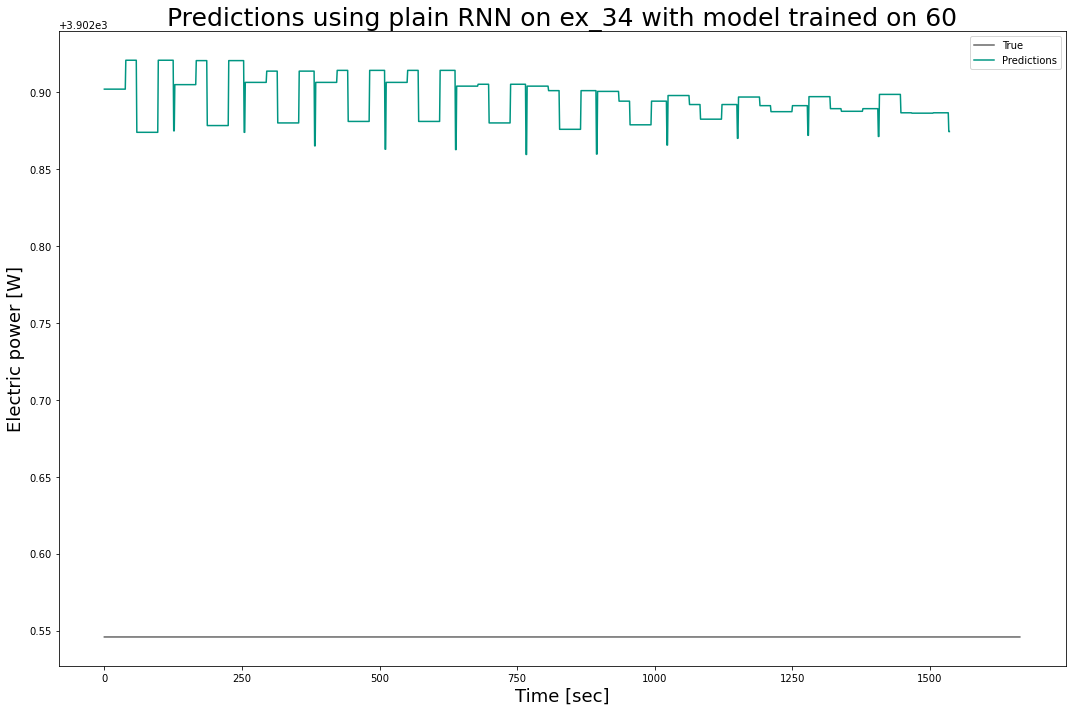

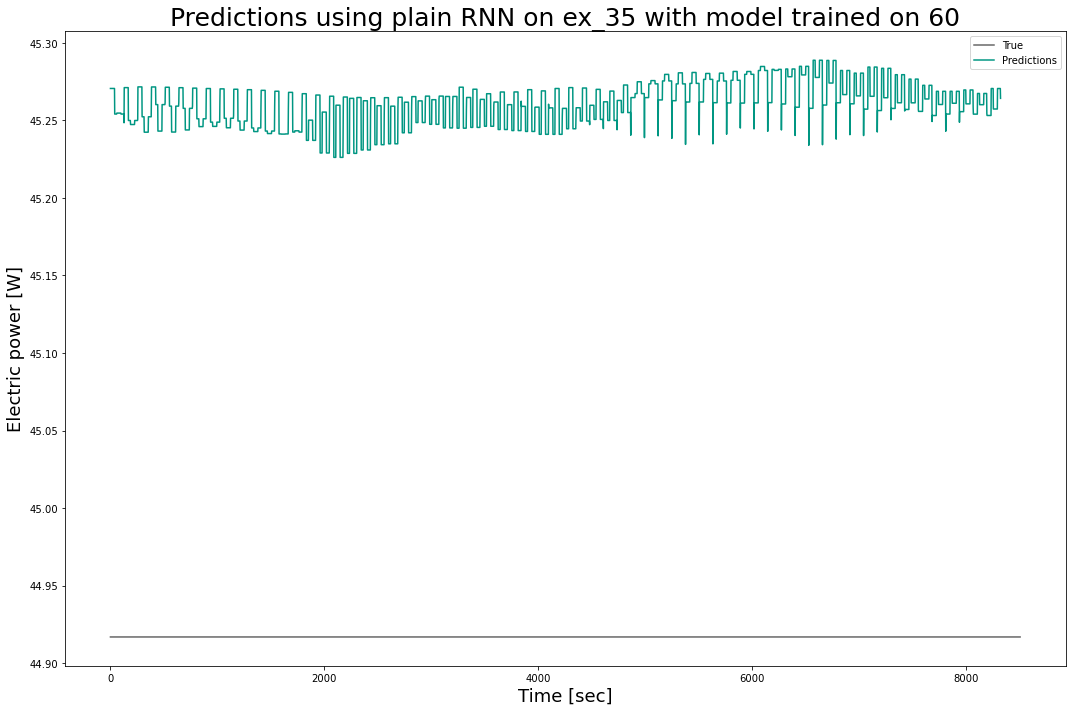

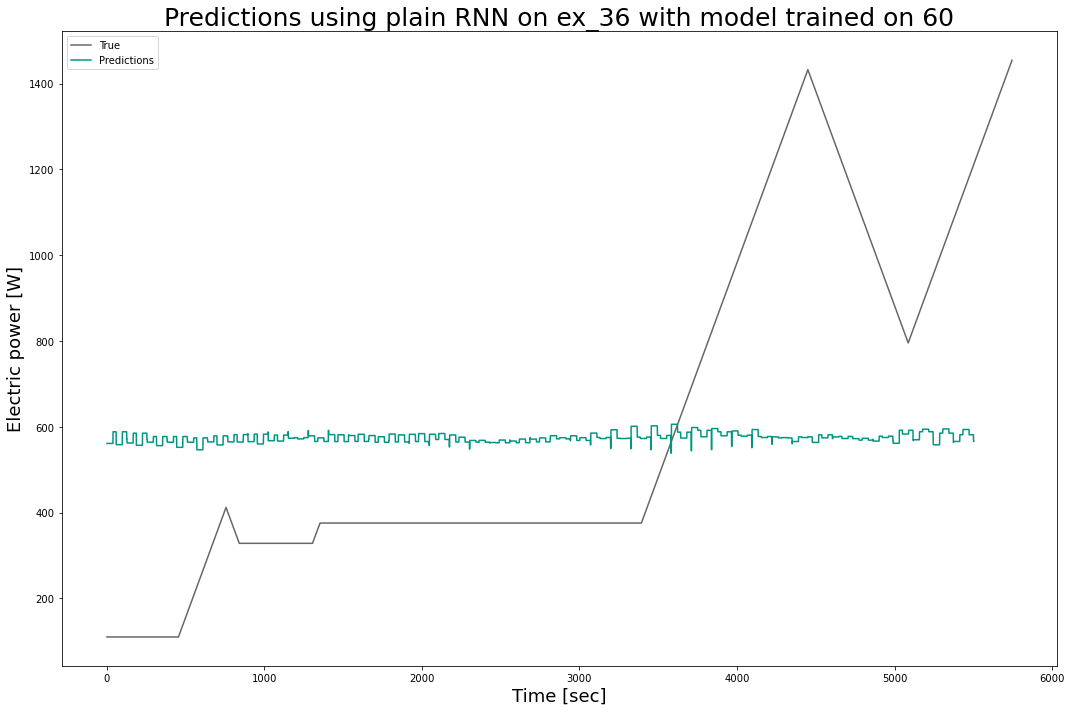

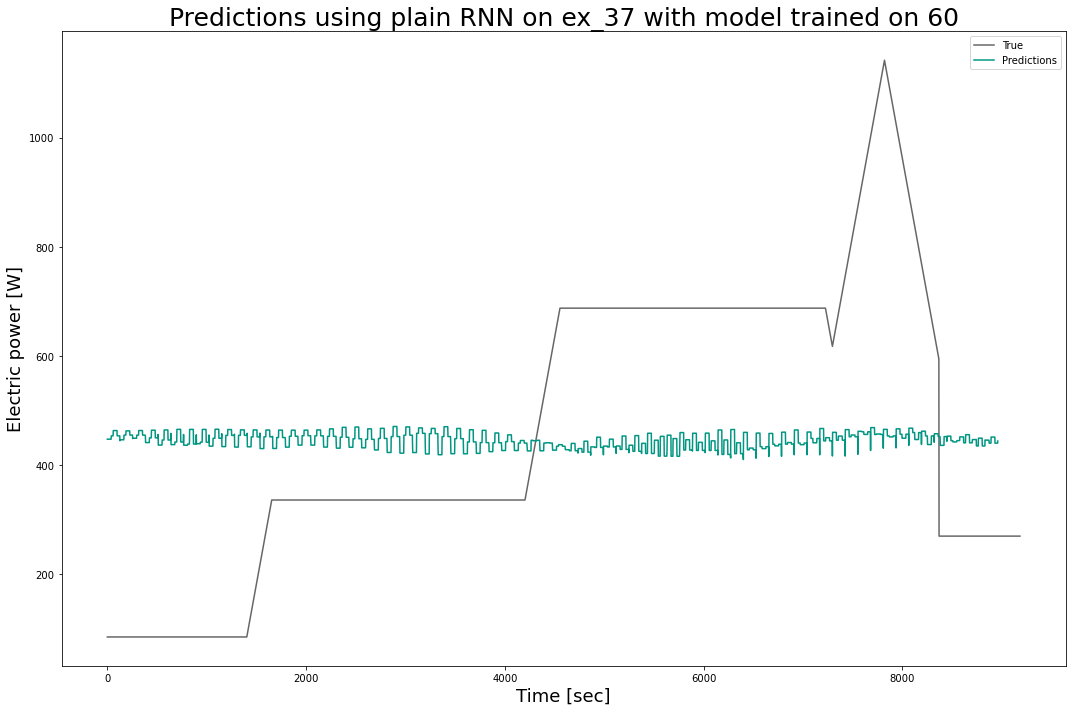

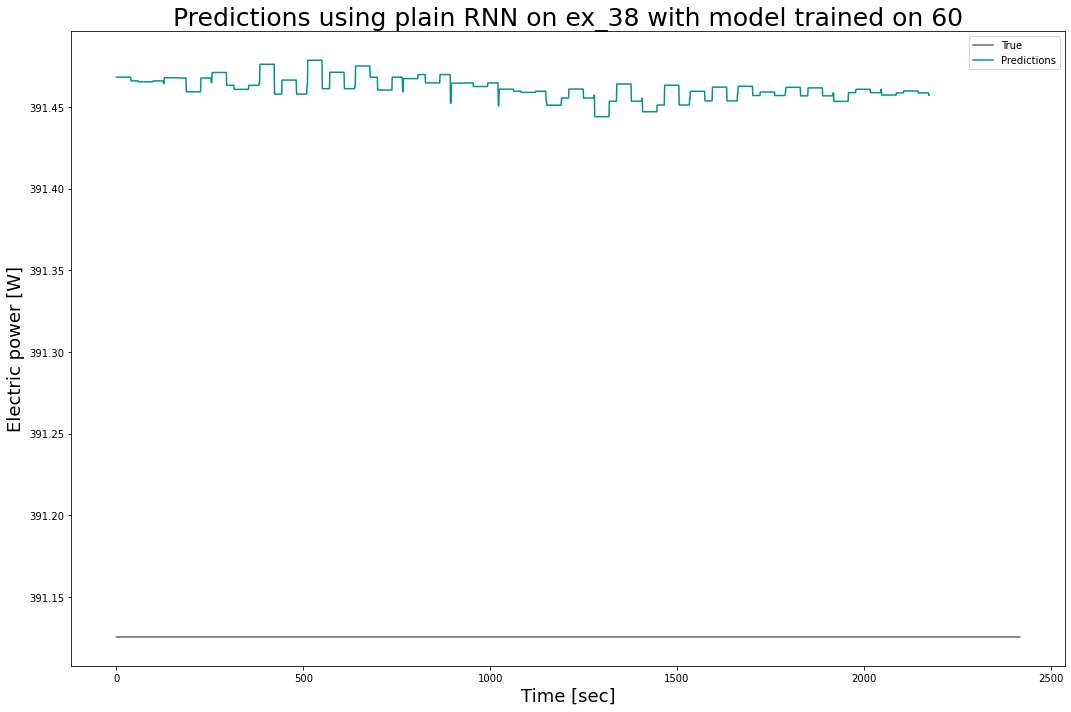

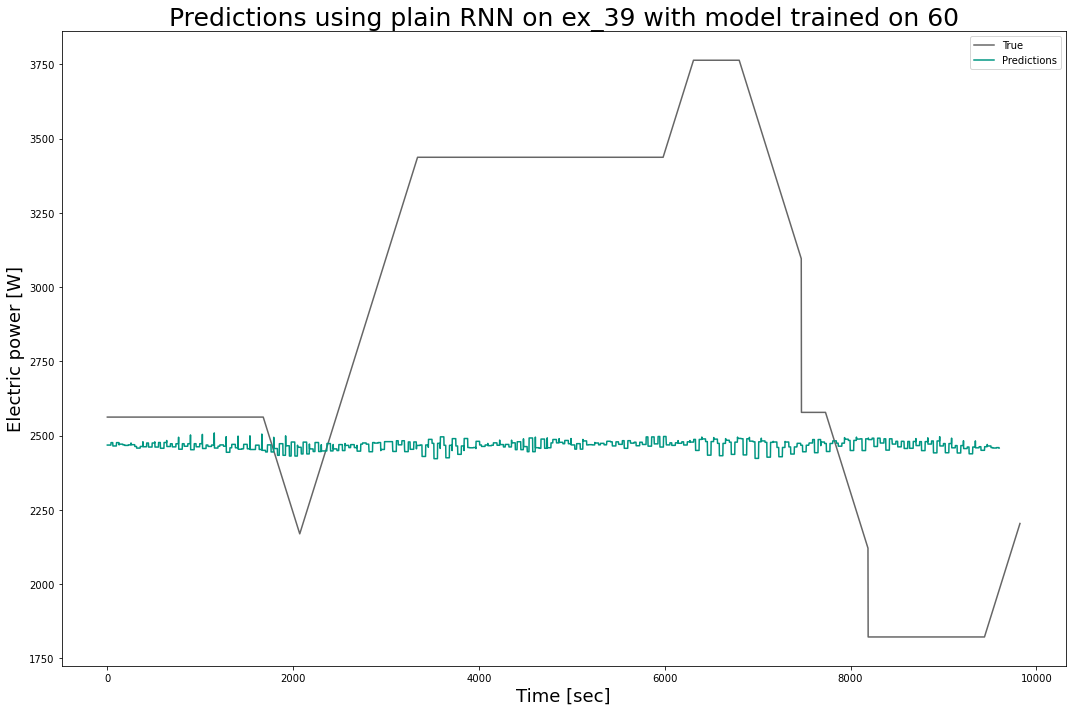

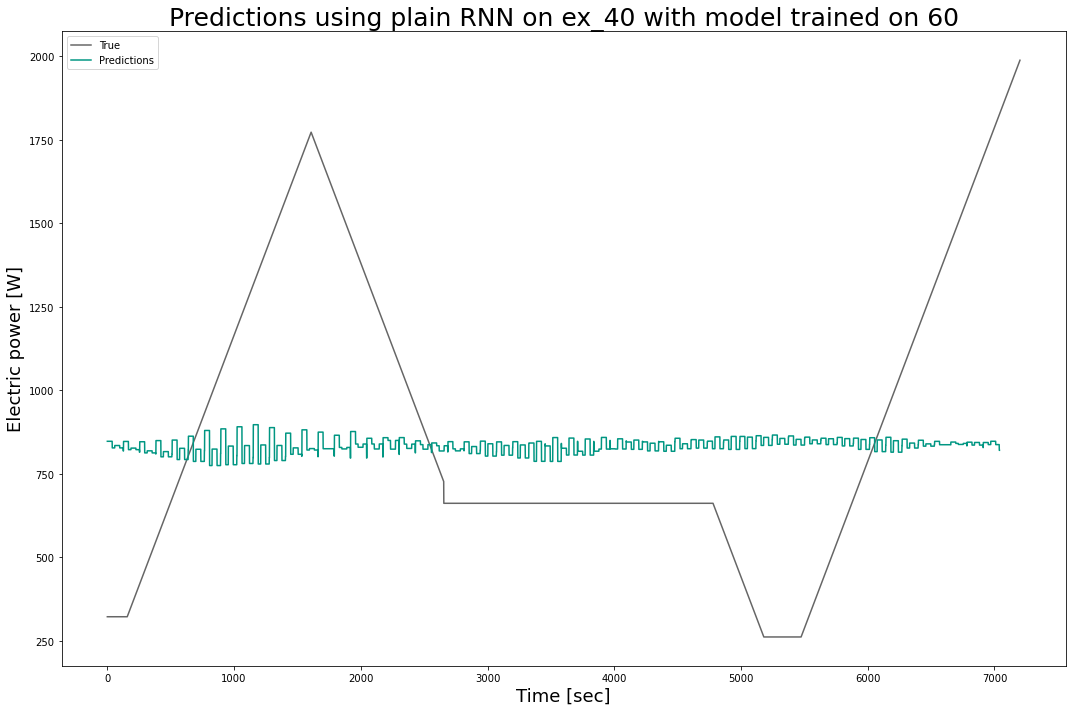

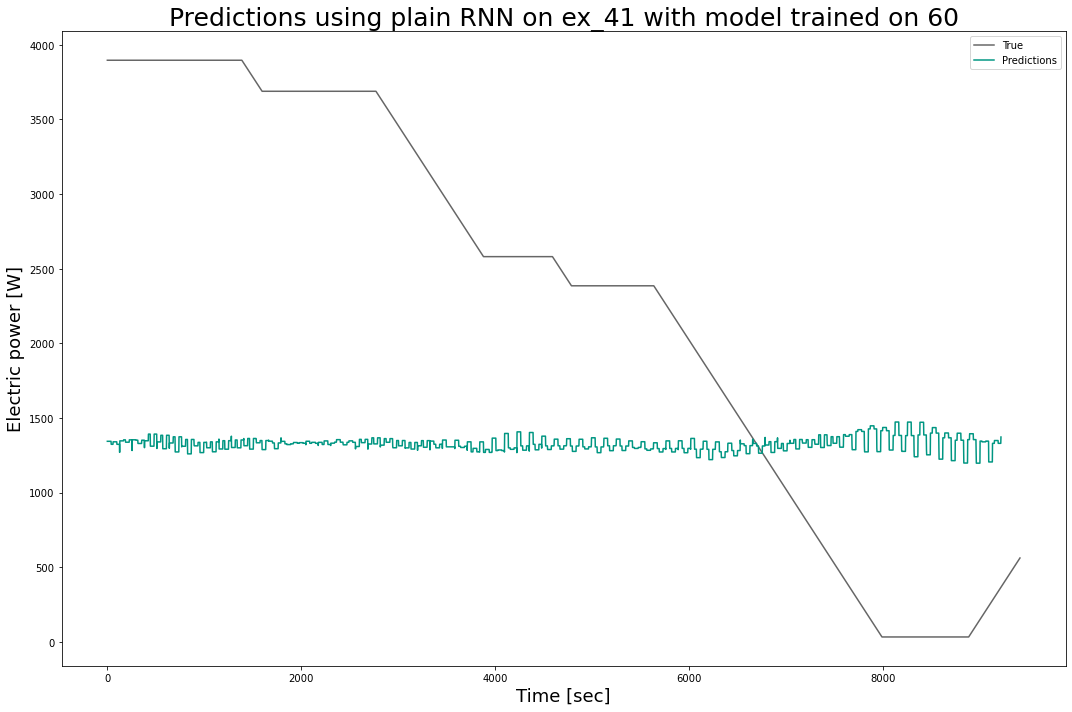

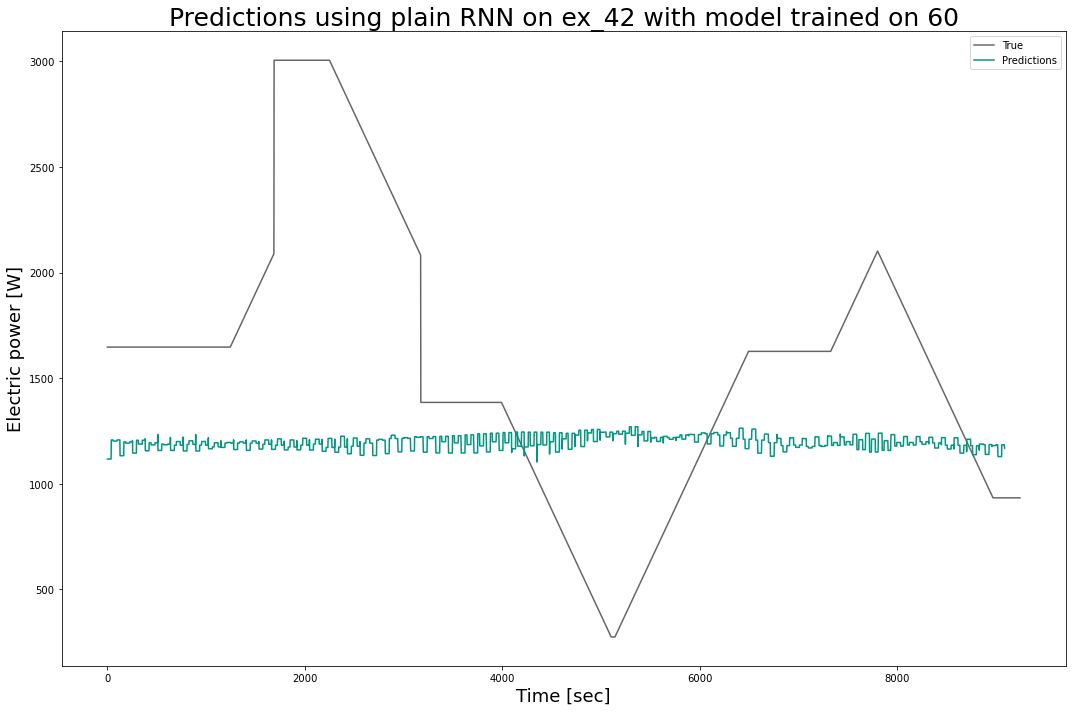

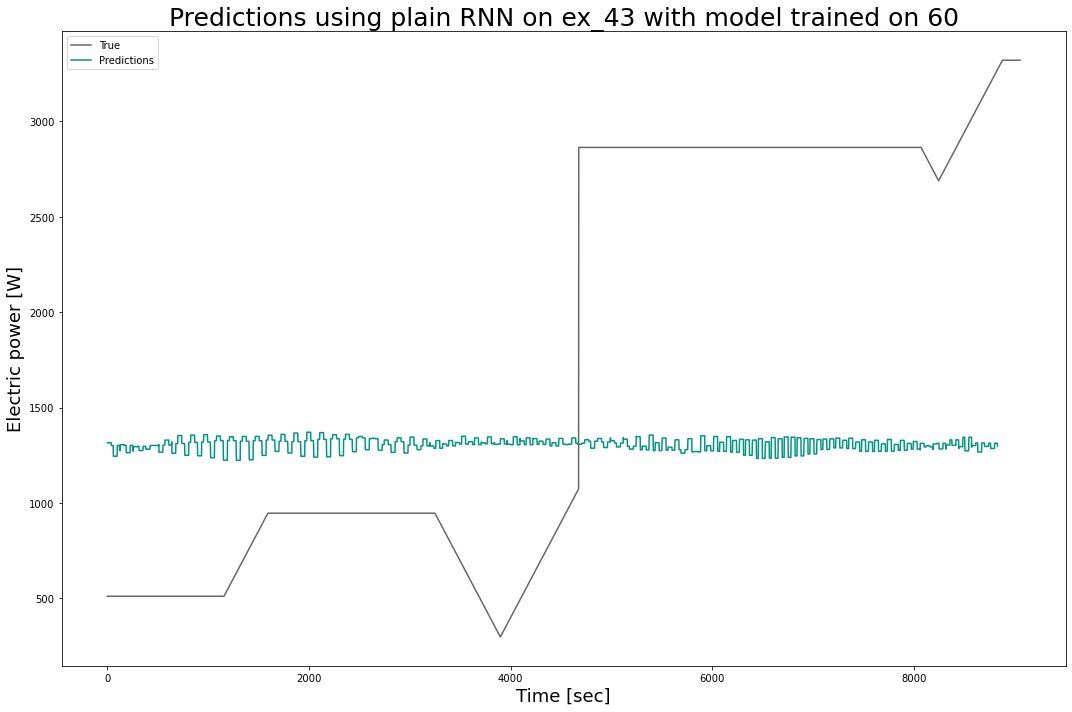

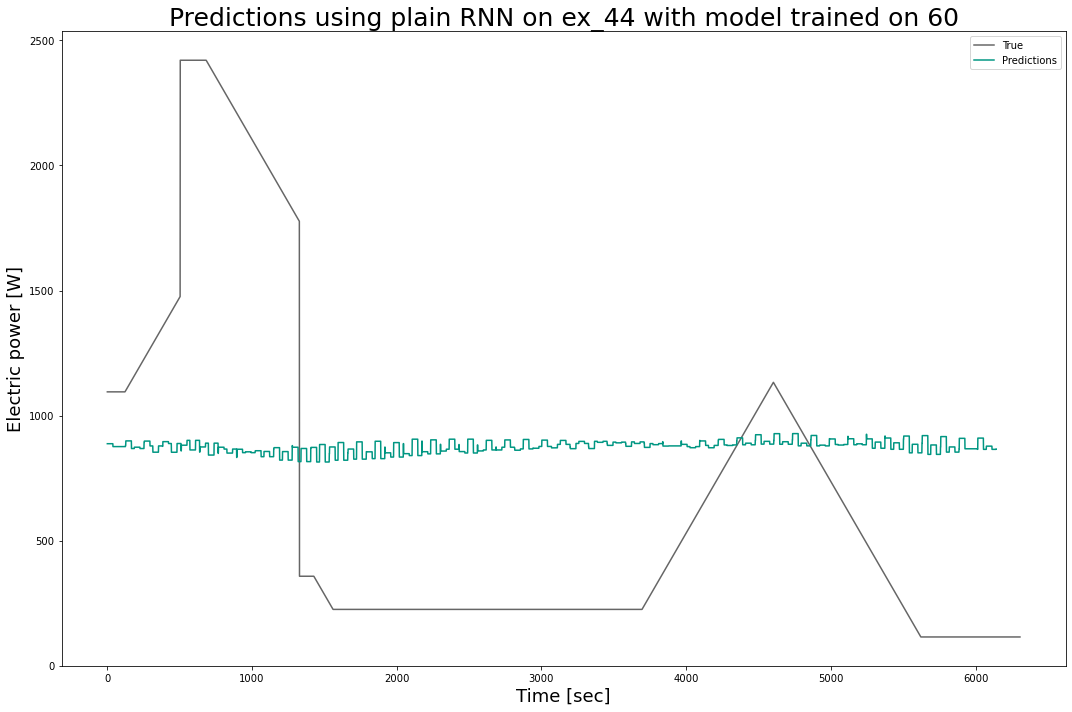

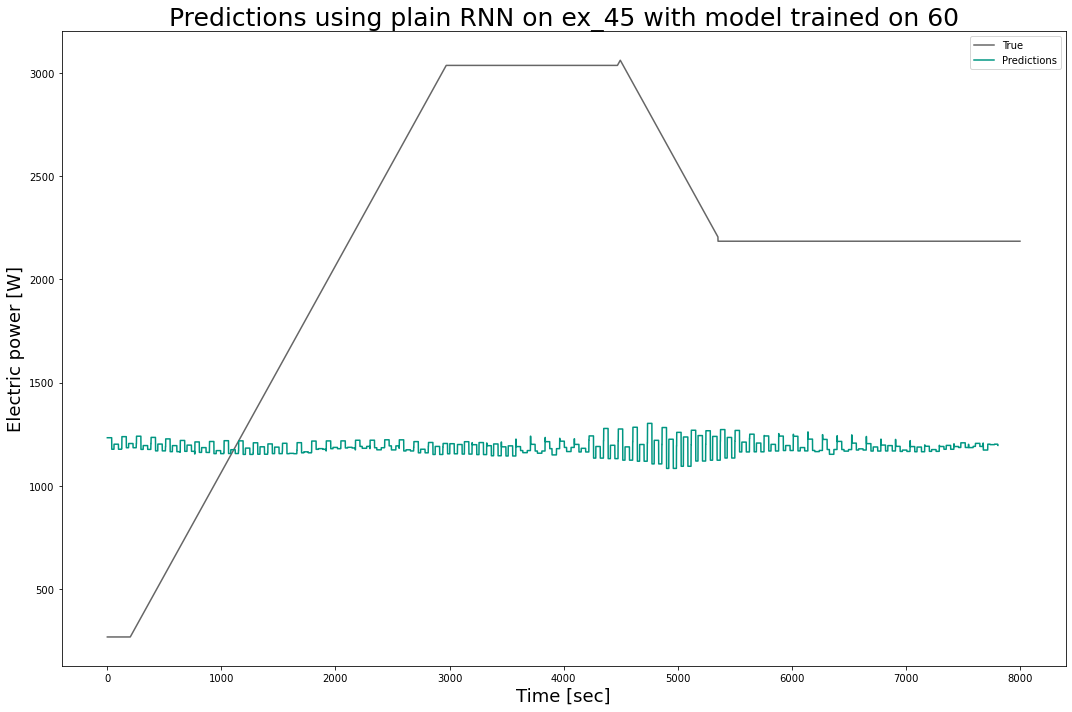

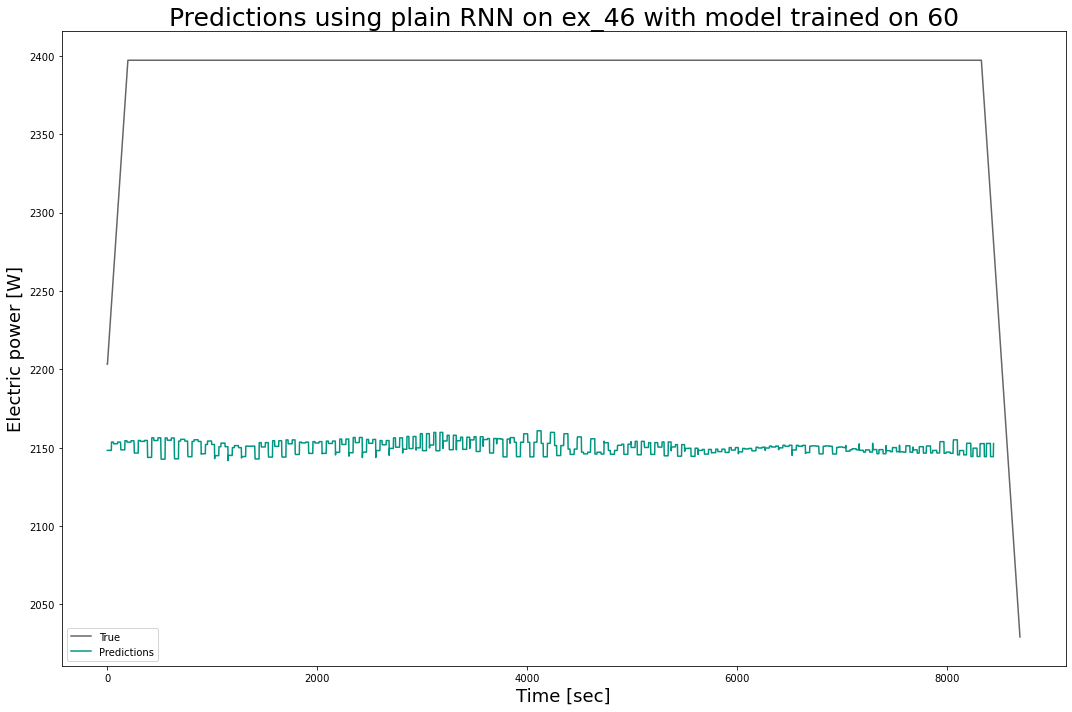

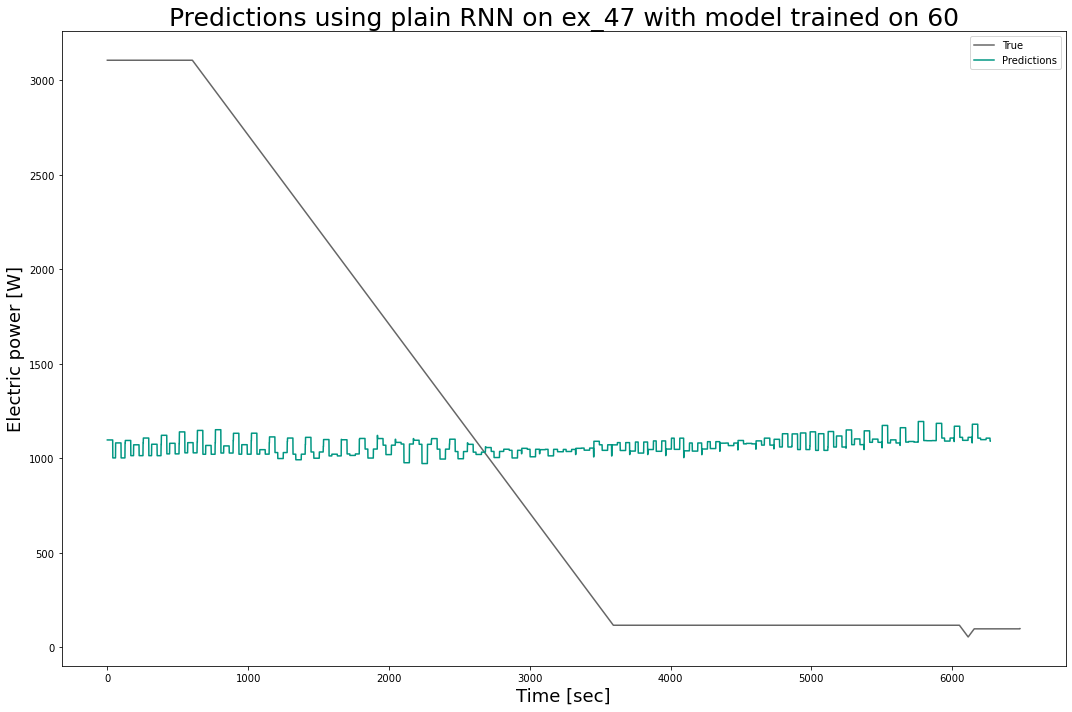

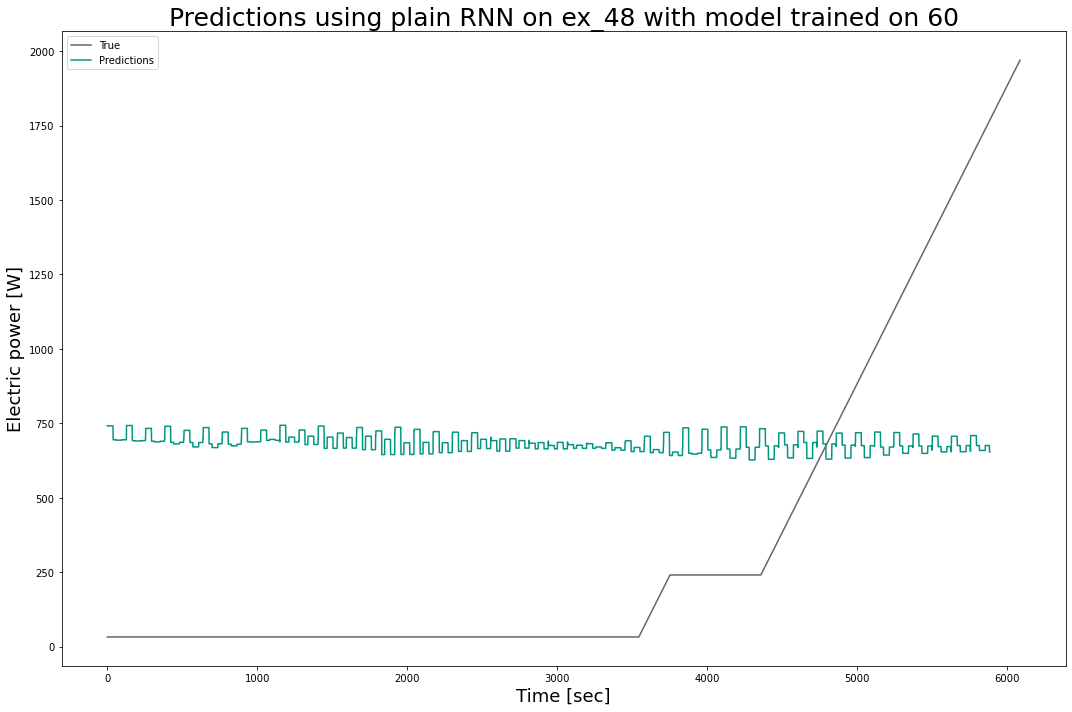

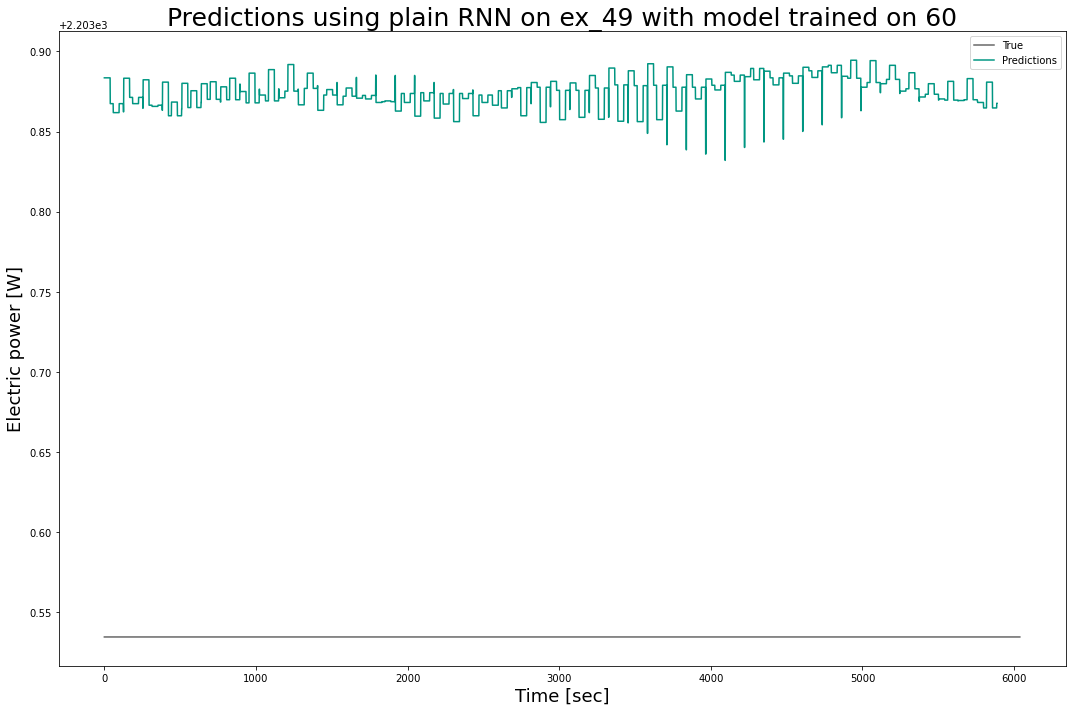

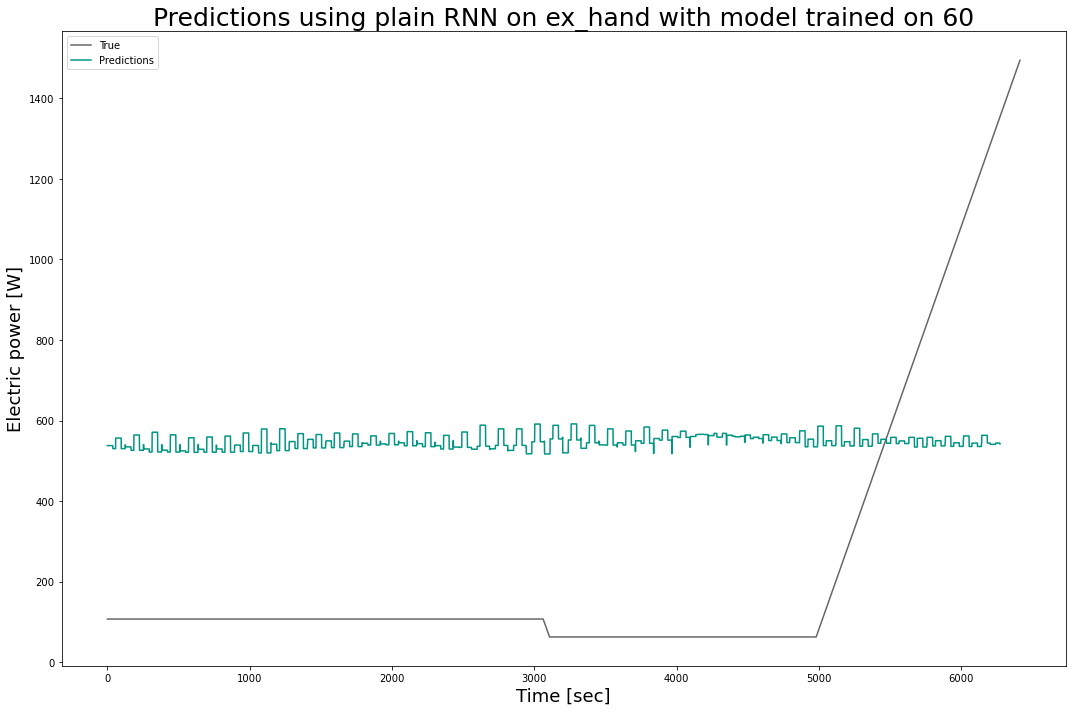

In [14]:
all_scaler = list()
all_X_values = list()
all_y_values = list()
all_predictions = list()
all_scaled_predictions = list()
results = pd.DataFrame(index = names, columns = ['rmse', 'r2', 'mae', 'maxae', 'rmse_scaled', 'r2_scaled', 'mae_scaled', 'maxae_scaled'])

for i in range(len(experiments)):
    rms, r2, mae, maxae = [], [], [], []
    scaler, X, y, preds_scaled, preds = nn.predictions(experiments[i], model,
                                                       difference_chosen = DIFFERENCE,
                                                      lag_chosen = LAG,
                                                      batch_size = BATCH_SIZE)
    all_scaler.append(scaler)
    all_X_values.append(X)
    all_y_values.append(y)
    all_predictions.append(preds)
    all_scaled_predictions.append(preds_scaled)
    
    gf.create_prediction_plot(experiments[i]['el_power'], preds, image_folder,
                              title = 'Predictions using plain RNN ',
                             specs = 'on ex_{0} with model trained on {1}'.format(names[i], train))
    
    results_ex = gf.measure_difference(experiments[i]['el_power'], preds[:,0], should_print = False)
    rms.append(results_ex['RMSE'][0])
    r2.append(results_ex['R2'][0])
    mae.append(results_ex['MAE'][0])
    maxae.append(results_ex['MaxAE'][0])
                   
    results.loc[names[i], 'rmse'] = rms
    results.loc[names[i], 'r2'] = r2
    results.loc[names[i], 'mae'] = mae
    results.loc[names[i], 'maxae'] = maxae
    results.to_csv(image_folder + "results.csv", sep = "|", encoding = 'utf-8')

In [15]:
losses = []
val_losses = []
for i in history:
    losses.append(i.history['loss'])
    val_losses.append(i.history['val_loss'])

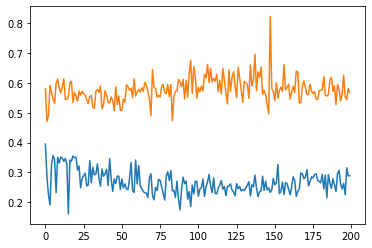

In [16]:
plt.plot(losses)
plt.plot(val_losses)